In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Load Data

data of period 2012-2015 should be treated specially becuase those data are in a different format.

In [107]:
#clean data belongs to 2012 - 2015
data12=pd.DataFrame(columns=['COMPANY ID', 'MAIN TYPE', 'SUB TYPE', 'SHORT NAME',
       'TRADING DATE', 'PRICE HIGH (Rs.)', 'PRICE LOW (Rs.)',
       'CLOSE PRICE (Rs.)', 'OPEN PRICE (Rs.)', 'TRADE VOLUME (No.)',
       'SHARE VOLUME (No.)', 'TURNOVER (Rs.)'])
data13=pd.DataFrame(columns=['COMPANY ID', 'MAIN TYPE', 'SUB TYPE', 'SHORT NAME',
       'TRADING DATE', 'PRICE HIGH (Rs.)', 'PRICE LOW (Rs.)',
       'CLOSE PRICE (Rs.)', 'OPEN PRICE (Rs.)', 'TRADE VOLUME (No.)',
       'SHARE VOLUME (No.)', 'TURNOVER (Rs.)'])
data14=pd.DataFrame(columns=['COMPANY ID', 'MAIN TYPE', 'SUB TYPE', 'SHORT NAME',
       'TRADING DATE', 'PRICE HIGH (Rs.)', 'PRICE LOW (Rs.)',
       'CLOSE PRICE (Rs.)', 'OPEN PRICE (Rs.)', 'TRADE VOLUME (No.)',
       'SHARE VOLUME (No.)', 'TURNOVER (Rs.)'])
data15=pd.DataFrame(columns=['COMPANY ID', 'MAIN TYPE', 'SUB TYPE', 'SHORT NAME',
       'TRADING DATE', 'PRICE HIGH (Rs.)', 'PRICE LOW (Rs.)',
       'CLOSE PRICE (Rs.)', 'OPEN PRICE (Rs.)', 'TRADE VOLUME (No.)',
       'SHARE VOLUME (No.)', 'TURNOVER (Rs.)'])



2012

In [108]:
data12r=pd.read_excel('Data/DailySharePrices/2012 Data.xlsx',header=1,
                      names=['Date','DateHigh','High','DateLow','low','closing','trades','shares','turnover','lasttraded',
                             'daystraded','b'])
data12r=data12r.iloc[:,:11]
data12r

,Date,DateHigh,High,DateLow,low,closing,trades,shares,turnover,lasttraded,daystraded
0,Company Id,: AAF,Security,Type : N,Sub Type,: 0000,NaN,NaN,NaN,NaT,NaN
1,Short Name,: ASIA ASSET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2,2012-01-12 00:00:00,2012-01-12 00:00:00,4.3,2012-01-12 00:00:00,3,4.2,2428.0,38538200.0,144153480.0,2012-01-12,1.0
3,2012-01-13 00:00:00,2012-01-13 00:00:00,6.3,2012-01-13 00:00:00,4.5,5.8,3132.0,40938200.0,226636450.0,2012-01-13,1.0
4,2012-01-17 00:00:00,2012-01-17 00:00:00,8.7,2012-01-17 00:00:00,6.3,8.5,3625.0,45760300.0,365896240.0,2012-01-17,1.0
...,...,...,...,...,...,...,...,...,...,...,...
62200,2012-12-21 00:00:00,2012-12-21 00:00:00,16.9,2012-12-21 00:00:00,16.9,16.9,1.0,100.0,1690.0,2012-12-21,1.0
62201,2012-12-24 00:00:00,2012-12-24 00:00:00,16.1,2012-12-24 00:00:00,16.1,16.1,1.0,1.0,16.1,2012-12-24,1.0
62202,2012-12-26 00:00:00,2012-12-26 00:00:00,16.5,2012-12-26 00:00:00,16.5,16.5,4.0,301.0,4966.5,2012-12-26,1.0
62203,2012-12-28 00:00:00,2012-12-28 00:00:00,17.1,2012-12-28 00:00:00,16.8,17,9.0,4057.0,68719.1,2012-12-28,1.0


In [109]:
data12temp=data12

#create index of companyids values to capture the data
nanindex=[]
for i in data12r.index:
    if (data12r['Date'][i]=='Company Id'):
        nanindex.append(i)
nanindex.append(62206)


In [110]:
for i in range(len(nanindex)-1):
    temp=data12r.iloc[nanindex[i]:nanindex[i+1],:]
    #temp=data12r.iloc[nanindex[0]:nanindex[1],:]
    cid=(list(temp.loc[temp['Date'] == 'Company Id', 'DateHigh'])[0])
    if isinstance(cid, str):
        cid=cid.replace(':','')
    else:
        cid=cid
    
    sectype=(list(temp.loc[temp['Date'] == 'Company Id', 'DateLow'])[0])
    if isinstance(sectype, str):
        sectype=sectype[-1]
    else:
        sectype=sectype
        
    
    subtype=(list(temp.loc[temp['Date'] == 'Company Id', 'closing'])[0])
    if isinstance(subtype, str):
        subtype=subtype.replace(':','')
    else:
        sectype=sectype
    
    cname=(list(temp.loc[temp['Date'] == 'Short Name', 'DateHigh'])[0])
    if isinstance(cname, str):
        cname=cname.replace(':','')
    else:
        cname=cname

    temp=temp.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)   
    temp=temp.reset_index(drop=True)
    data12temp['TRADING DATE']=temp['Date']
    print(cid,i,len(temp))
    if len(temp)>0:
        for j in temp.index:
            #data12temp=data12
            data12temp['COMPANY ID'][j]=cid
            data12temp['MAIN TYPE'][j]=sectype
            data12temp['SUB TYPE'][j]=subtype
            data12temp['SHORT NAME'][j]=cname
            data12temp['TRADING DATE'][j]=temp['Date'][j]
            data12temp['PRICE HIGH (Rs.)'][j]=temp['High'][j]
            data12temp['PRICE LOW (Rs.)'][j]=temp['low'][j]
            data12temp['CLOSE PRICE (Rs.)'][j]=temp['closing'][j]
            data12temp['OPEN PRICE (Rs.)'][j]=0
            data12temp['TRADE VOLUME (No.)'][j]=temp['trades'][j]
            data12temp['SHARE VOLUME (No.)'][j]=temp['shares'][j]
            data12temp['TURNOVER (Rs.)'][j]=temp['turnover'][j]
       
        data12=data12.append(data12temp, ignore_index=True)
        
data12=data12.dropna(axis=0, how='any', thresh=None, subset=None)  
data12




  AAF 0 234
  AAIC 1 228
  ABAN 2 211
  ACAP 3 223
  ACL 4 224
  ACME 5 242
  AEL 6 186
  AFSL 7 167
  AGAL 8 220
  AGST 9 191
  AGST 10 1
  AHPL 11 216
  AHUN 12 240
  ALLI 13 167
  ALUF 14 233
  AMF 15 70
  AMSL 16 234
  APLA 17 149
  ARPI 18 150
  ASCO 19 173
  ASHA 20 110
  ASHO 21 151
  ASIR 22 23
  ASIR 23 219
  ASIY 24 66
  ASPH 25 191
  ATL 26 242
  AUTO 27 133
  BALA 28 240
  BBH 29 234
  BERU 30 122
  BFL 31 241
  BHR 32 107
  BIL 33 242
  BINN 34 152
  BLI 35 202
  BLUE 36 242
  BLUE 37 242
  BOGA 38 220
  BOPL 39 232
  BREW 40 103
  BRWN 41 231
  BUKI 42 235
  CABO 43 167
   CALF 44 219
  CALF 45 6
  CARE 46 163
  CARG 47 216
  CARS 48 235
  CCS 49 223
  CDB 50 234
  CDB 51 179
  CDIC 52 169
  CERA 53 161
  CFI 54 137
  CFI 55 5
  CFIN 56 240
  CFL 57 217
  CFLB 58 241
  CFT 59 235
  CFVF 60 237
  CHL 61 152
  CHL 62 127
  CHMX 63 150
  CHOT 64 235
  CHOU 65 222
  CIC 66 221
  CIC 67 222
  CIFL 68 242
  CIND 69 188
  CINS 70 154
  CINS 71 157
  CINV 72 224
  CIT 73 143
  CI

,COMPANY ID,MAIN TYPE,SUB TYPE,SHORT NAME,TRADING DATE,PRICE HIGH (Rs.),PRICE LOW (Rs.),CLOSE PRICE (Rs.),OPEN PRICE (Rs.),TRADE VOLUME (No.),SHARE VOLUME (No.),TURNOVER (Rs.)
0,AAF,N,0000,ASIA ASSET,2012-01-12 00:00:00,4.3,3,4.2,0,2428.0,38538200.0,144153480.0
1,AAF,N,0000,ASIA ASSET,2012-01-13 00:00:00,6.3,4.5,5.8,0,3132.0,40938200.0,226636450.0
2,AAF,N,0000,ASIA ASSET,2012-01-17 00:00:00,8.7,6.3,8.5,0,3625.0,45760300.0,365896240.0
3,AAF,N,0000,ASIA ASSET,2012-01-18 00:00:00,8.9,5.2,5.5,0,2628.0,21117600.0,152660190.0
4,AAF,N,0000,ASIA ASSET,2012-01-19 00:00:00,7.5,4.7,7.1,0,3231.0,23529800.0,156061890.0
...,...,...,...,...,...,...,...,...,...,...,...,...
76981,YORK,N,0000,YORK ARCADE,2012-12-18 00:00:00,15.8,15.8,15.8,0,1.0,200.0,3160.0
76982,YORK,N,0000,YORK ARCADE,2012-12-19 00:00:00,16.8,16.8,16.8,0,1.0,1.0,16.8
76983,YORK,N,0000,YORK ARCADE,2012-12-20 00:00:00,16,16,16,0,1.0,99.0,1584.0
76984,YORK,N,0000,YORK ARCADE,2012-12-21 00:00:00,16.9,16.9,16.9,0,1.0,100.0,1690.0


2013

In [111]:
data13r=pd.read_excel('Data/DailySharePrices/2013 Data.xlsx',
                      names=['Date','DateHigh','High','DateLow','low','closing','trades','shares','turnover','lasttraded',
                             'daystraded'])
data13r

,Date,DateHigh,High,DateLow,low,closing,trades,shares,turnover,lasttraded,daystraded
0,Company Id :,AAF,Security,Type : N,Sub Type,: 0000,NaN,NaN,NaN,NaT,NaN
1,Short Name :,ASIA ASSET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2,2013-01-02 00:00:00,2013-01-02 00:00:00,3.2,2013-01-02 00:00:00,2.9,3,467.0,4165602.0,12628887.4,2013-01-02,1.0
3,2013-01-03 00:00:00,2013-01-03 00:00:00,3.2,2013-01-03 00:00:00,2.9,3,194.0,2510471.0,7567663.1,2013-01-03,1.0
4,2013-01-04 00:00:00,2013-01-04 00:00:00,3.1,2013-01-04 00:00:00,2.9,3,66.0,245201.0,735505.4,2013-01-04,1.0
...,...,...,...,...,...,...,...,...,...,...,...
61782,2013-12-24 00:00:00,2013-12-24 00:00:00,13.6,2013-12-24 00:00:00,13.6,13.6,1.0,3000.0,40800.0,2013-12-24,1.0
61783,2013-12-26 00:00:00,2013-12-26 00:00:00,13.8,2013-12-26 00:00:00,13.5,13.5,8.0,1080.0,14673.0,2013-12-26,1.0
61784,2013-12-27 00:00:00,2013-12-27 00:00:00,13.8,2013-12-27 00:00:00,13.6,13.7,9.0,5435.0,74516.0,2013-12-27,1.0
61785,2013-12-30 00:00:00,2013-12-30 00:00:00,14,2013-12-30 00:00:00,13.6,13.6,21.0,19045.0,259709.0,2013-12-30,1.0


In [112]:

data13temp=data13

#create index of companyids values to capture the data
nanindex=[]
for i in data13r.index:
    if (data13r['Date'][i]=='Company Id :'):
        nanindex.append(i)
nanindex.append(61788)


In [113]:
for i in range(len(nanindex)-1):
    temp=data13r.iloc[nanindex[i]:nanindex[i+1],:]
    cid=(list(temp.loc[temp['Date'] == 'Company Id :', 'DateHigh'])[0])
    if isinstance(cid, str):
        cid=cid.replace(':','')
    else:
        cid=cid
    sectype=(list(temp.loc[temp['Date'] == 'Company Id :', 'DateLow'])[0])
    if isinstance(sectype, str):
        sectype=sectype[-1]
    else:
        sectype=sectype
    subtype=(list(temp.loc[temp['Date'] == 'Company Id :', 'closing'])[0])
    if isinstance(subtype, str):
        subtype=subtype.replace(':','')
    else:
        sectype=sectype
    
    cname=(list(temp.loc[temp['Date'] == 'Short Name :', 'DateHigh'])[0])
    if isinstance(cname, str):
        cname=cname.replace(':','')
    else:
        cname=cname
    temp=temp.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)   
    temp=temp.reset_index(drop=True)
    data13temp['TRADING DATE']=temp['Date']
    #print(cid,i,len(temp))
    if len(temp)>0:
        for j in temp.index:
            #data12temp=data12
            data13temp['COMPANY ID'][j]=cid
            data13temp['MAIN TYPE'][j]=sectype
            data13temp['SUB TYPE'][j]=subtype
            data13temp['SHORT NAME'][j]=cname
            data13temp['TRADING DATE'][j]=temp['Date'][j]
            data13temp['PRICE HIGH (Rs.)'][j]=temp['High'][j]
            data13temp['PRICE LOW (Rs.)'][j]=temp['low'][j]
            data13temp['CLOSE PRICE (Rs.)'][j]=temp['closing'][j]
            data13temp['OPEN PRICE (Rs.)'][j]=0
            data13temp['TRADE VOLUME (No.)'][j]=temp['trades'][j]
            data13temp['SHARE VOLUME (No.)'][j]=temp['shares'][j]
            data13temp['TURNOVER (Rs.)'][j]=temp['turnover'][j]
       
        data13=data13.append(data13temp, ignore_index=True)
        
data13=data13.dropna(axis=0, how='any', thresh=None, subset=None)  
data13

    

,COMPANY ID,MAIN TYPE,SUB TYPE,SHORT NAME,TRADING DATE,PRICE HIGH (Rs.),PRICE LOW (Rs.),CLOSE PRICE (Rs.),OPEN PRICE (Rs.),TRADE VOLUME (No.),SHARE VOLUME (No.),TURNOVER (Rs.)
0,AAF,N,0000,ASIA ASSET,2013-01-02 00:00:00,3.2,2.9,3,0,467.0,4165602.0,12628887.4
1,AAF,N,0000,ASIA ASSET,2013-01-03 00:00:00,3.2,2.9,3,0,194.0,2510471.0,7567663.1
2,AAF,N,0000,ASIA ASSET,2013-01-04 00:00:00,3.1,2.9,3,0,66.0,245201.0,735505.4
3,AAF,N,0000,ASIA ASSET,2013-01-07 00:00:00,3,2.9,2.9,0,50.0,352628.0,1027472.1
4,AAF,N,0000,ASIA ASSET,2013-01-08 00:00:00,3,2.8,2.9,0,78.0,66156.0,191161.2
...,...,...,...,...,...,...,...,...,...,...,...,...
76377,YORK,N,0000,YORK,2013-12-24 00:00:00,13.6,13.6,13.6,0,1.0,3000.0,40800.0
76378,YORK,N,0000,YORK,2013-12-26 00:00:00,13.8,13.5,13.5,0,8.0,1080.0,14673.0
76379,YORK,N,0000,YORK,2013-12-27 00:00:00,13.8,13.6,13.7,0,9.0,5435.0,74516.0
76380,YORK,N,0000,YORK,2013-12-30 00:00:00,14,13.6,13.6,0,21.0,19045.0,259709.0


2014

In [114]:
data14r=pd.read_excel('Data/DailySharePrices/2014 Data.xlsx',
                      names=['Date','DateHigh','High','DateLow','low','closing','trades','shares','turnover','lasttraded',
                             'daystraded'])
data14r

,Date,DateHigh,High,DateLow,low,closing,trades,shares,turnover,lasttraded,daystraded
0,"DAILY HIGH, LOW AND CLOSING PRICE OF 02ND JANU...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,Company Id :,AAF,Security,Type : N,NaN,Sub Type : 0000,NaN,NaN,NaN,NaT,NaN
2,Short Name :,ASIA ASSET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,2014-01-02 00:00:00,2014-01-02 00:00:00,2.1,2014-01-02 00:00:00,1.9,2,298.0,4594610.0,9073093.5,2014-01-02,1.0
4,2014-01-03 00:00:00,2014-01-03 00:00:00,2,2014-01-03 00:00:00,1.9,1.9,23.0,79594.0,156084.6,2014-01-03,1.0
...,...,...,...,...,...,...,...,...,...,...,...
63921,2014-12-23 00:00:00,2014-12-23 00:00:00,16,2014-12-23 00:00:00,15.9,16,3.0,430.0,6867.0,2014-12-23,1.0
63922,2014-12-24 00:00:00,2014-12-24 00:00:00,16.5,2014-12-24 00:00:00,16.5,16.5,5.0,424.0,6996.0,2014-12-24,1.0
63923,2014-12-26 00:00:00,2014-12-26 00:00:00,17.2,2014-12-26 00:00:00,16.6,17,10.0,1116.0,19005.7,2014-12-26,1.0
63924,2014-12-29 00:00:00,2014-12-29 00:00:00,16.3,2014-12-29 00:00:00,16.2,16.3,3.0,270.0,4391.0,2014-12-29,1.0


In [115]:

data14temp=data14

#create index of companyids values to capture the data
nanindex=[]
for i in data14r.index:
    if (data14r['Date'][i]=='Company Id :'):
        nanindex.append(i)
nanindex.append(63925)


In [116]:
for i in range(len(nanindex)-1):
    temp=data14r.iloc[nanindex[i]:nanindex[i+1],:]
    cid=(list(temp.loc[temp['Date'] == 'Company Id :', 'DateHigh'])[0])
    if isinstance(cid, str):
        cid=cid.replace(':','')
    else:
        cid=cid
    sectype=(list(temp.loc[temp['Date'] == 'Company Id :', 'DateLow'])[0])
    if isinstance(sectype, str):
        sectype=sectype[-1]
    else:
        sectype=sectype
    subtype=(list(temp.loc[temp['Date'] == 'Company Id :', 'closing'])[0])
    if isinstance(subtype, str):
        subtype=subtype.replace(':','')
    else:
        sectype=sectype
    
    cname=(list(temp.loc[temp['Date'] == 'Short Name :', 'DateHigh'])[0])
    if isinstance(cname, str):
        cname=cname.replace(':','')
    else:
        cname=cname
    temp=temp.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)   
    temp=temp.reset_index(drop=True)
    data14temp['TRADING DATE']=temp['Date']
    #print(cid,i,len(temp))
    if len(temp)>0:
        for j in temp.index:
            #data12temp=data12
            data14temp['COMPANY ID'][j]=cid
            data14temp['MAIN TYPE'][j]=sectype
            data14temp['SUB TYPE'][j]=subtype
            data14temp['SHORT NAME'][j]=cname
            data14temp['TRADING DATE'][j]=temp['Date'][j]
            data14temp['PRICE HIGH (Rs.)'][j]=temp['High'][j]
            data14temp['PRICE LOW (Rs.)'][j]=temp['low'][j]
            data14temp['CLOSE PRICE (Rs.)'][j]=temp['closing'][j]
            data14temp['OPEN PRICE (Rs.)'][j]=0
            data14temp['TRADE VOLUME (No.)'][j]=temp['trades'][j]
            data14temp['SHARE VOLUME (No.)'][j]=temp['shares'][j]
            data14temp['TURNOVER (Rs.)'][j]=temp['turnover'][j]
       
        data14=data14.append(data14temp, ignore_index=True)
        
data14=data14.dropna(axis=0, how='any', thresh=None, subset=None)  
data14

    

,COMPANY ID,MAIN TYPE,SUB TYPE,SHORT NAME,TRADING DATE,PRICE HIGH (Rs.),PRICE LOW (Rs.),CLOSE PRICE (Rs.),OPEN PRICE (Rs.),TRADE VOLUME (No.),SHARE VOLUME (No.),TURNOVER (Rs.)
0,AAF,N,Sub Type 0000,ASIA ASSET,2014-01-02 00:00:00,2.1,1.9,2,0,298.0,4594610.0,9073093.5
1,AAF,N,Sub Type 0000,ASIA ASSET,2014-01-03 00:00:00,2,1.9,1.9,0,23.0,79594.0,156084.6
2,AAF,N,Sub Type 0000,ASIA ASSET,2014-01-06 00:00:00,1.9,1.9,1.9,0,37.0,286997.0,545294.3
3,AAF,N,Sub Type 0000,ASIA ASSET,2014-01-07 00:00:00,2,1.8,1.9,0,20.0,55004.0,102367.7
4,AAF,N,Sub Type 0000,ASIA ASSET,2014-01-08 00:00:00,2,1.9,1.9,0,8.0,56600.0,107670.0
...,...,...,...,...,...,...,...,...,...,...,...,...
78466,YORK,N,Sub Type 0000,YORK ARCADE,2014-12-22 00:00:00,16.5,16,16.5,0,5.0,706.0,11299.0
78467,YORK,N,Sub Type 0000,YORK ARCADE,2014-12-23 00:00:00,16,15.9,16,0,3.0,430.0,6867.0
78468,YORK,N,Sub Type 0000,YORK ARCADE,2014-12-24 00:00:00,16.5,16.5,16.5,0,5.0,424.0,6996.0
78469,YORK,N,Sub Type 0000,YORK ARCADE,2014-12-26 00:00:00,17.2,16.6,17,0,10.0,1116.0,19005.7


2015

In [117]:
data15r=pd.read_excel('Data/DailySharePrices/2015 Data .xlsx',
                      names=['Date','DateHigh','High','DateLow','low','closing','trades','shares','turnover','lasttraded',
                             'daystraded','b'])
data15r=data15r.iloc[:,:11]
data15r

,Date,DateHigh,High,DateLow,low,closing,trades,shares,turnover,lasttraded,daystraded
0,"DAILY HIGH, LOW AND CLOSING PRICE OF 02ND JANU...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,Company Id :,AAF,Security,Type : N,Sub Type,: 0000,NaN,NaN,NaN,NaT,NaN
2,Short Name :,ASIA ASSET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,2015-01-02 00:00:00,2015-01-02 00:00:00,2,2015-01-02 00:00:00,1.8,1.9,48,1657683.0,3149594.7,2015-01-02,1.0
4,2015-01-06 00:00:00,2015-01-06 00:00:00,2,2015-01-06 00:00:00,1.9,2,61,1701013.0,3400025.9,2015-01-06,1.0
...,...,...,...,...,...,...,...,...,...,...,...
59370,2015-12-18 00:00:00,2015-12-18 00:00:00,15.5,2015-12-18 00:00:00,15.5,15.5,1,1.0,15.5,2015-12-18,1.0
59371,2015-12-22 00:00:00,2015-12-22 00:00:00,15,2015-12-22 00:00:00,14.7,15,2,202.0,2999.4,2015-12-22,1.0
59372,2015-12-28 00:00:00,2015-12-28 00:00:00,14.9,2015-12-28 00:00:00,14.5,14.6,4,1307.0,19134.3,2015-12-28,1.0
59373,2015-12-29 00:00:00,2015-12-29 00:00:00,15,2015-12-29 00:00:00,14.5,15,4,303.0,4544.5,2015-12-29,1.0


In [118]:
data15temp=data15

#create index of companyids values to capture the data
nanindex=[]
for i in data15r.index:
    if (data15r['Date'][i]=='Company Id :'):
        nanindex.append(i)
nanindex.append(59375)


In [119]:
data15r

,Date,DateHigh,High,DateLow,low,closing,trades,shares,turnover,lasttraded,daystraded
0,"DAILY HIGH, LOW AND CLOSING PRICE OF 02ND JANU...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,Company Id :,AAF,Security,Type : N,Sub Type,: 0000,NaN,NaN,NaN,NaT,NaN
2,Short Name :,ASIA ASSET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,2015-01-02 00:00:00,2015-01-02 00:00:00,2,2015-01-02 00:00:00,1.8,1.9,48,1657683.0,3149594.7,2015-01-02,1.0
4,2015-01-06 00:00:00,2015-01-06 00:00:00,2,2015-01-06 00:00:00,1.9,2,61,1701013.0,3400025.9,2015-01-06,1.0
...,...,...,...,...,...,...,...,...,...,...,...
59370,2015-12-18 00:00:00,2015-12-18 00:00:00,15.5,2015-12-18 00:00:00,15.5,15.5,1,1.0,15.5,2015-12-18,1.0
59371,2015-12-22 00:00:00,2015-12-22 00:00:00,15,2015-12-22 00:00:00,14.7,15,2,202.0,2999.4,2015-12-22,1.0
59372,2015-12-28 00:00:00,2015-12-28 00:00:00,14.9,2015-12-28 00:00:00,14.5,14.6,4,1307.0,19134.3,2015-12-28,1.0
59373,2015-12-29 00:00:00,2015-12-29 00:00:00,15,2015-12-29 00:00:00,14.5,15,4,303.0,4544.5,2015-12-29,1.0


In [120]:
for i in range(len(nanindex)-1):
    temp=data15r.iloc[nanindex[i]:nanindex[i+1],:]
    cid=(list(temp.loc[temp['Date'] == 'Company Id :', 'DateHigh'])[0])
    if isinstance(cid, str):
        cid=cid.replace(':','')
    else:
        cid=cid
    sectype=(list(temp.loc[temp['Date'] == 'Company Id :', 'DateLow'])[0])
    if isinstance(sectype, str):
        sectype=sectype[-1]
    else:
        sectype=sectype
    subtype=(list(temp.loc[temp['Date'] == 'Company Id :', 'closing'])[0])
    if isinstance(subtype, str):
        subtype=subtype.replace(':','')
    else:
        sectype=sectype
    
    cname=(list(temp.loc[temp['Date'] == 'Short Name :', 'DateHigh'])[0])
    if isinstance(cname, str):
        cname=cname.replace(':','')
    else:
        cname=cname
    temp=temp.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)   
    temp=temp.reset_index(drop=True)
    data15temp['TRADING DATE']=temp['Date']
    #print(cid,i,len(temp))
    if len(temp)>0:
        for j in temp.index:
            #data12temp=data12
            data15temp['COMPANY ID'][j]=cid
            data15temp['MAIN TYPE'][j]=sectype
            data15temp['SUB TYPE'][j]=subtype
            data15temp['SHORT NAME'][j]=cname
            data15temp['TRADING DATE'][j]=temp['Date'][j]
            data15temp['PRICE HIGH (Rs.)'][j]=temp['High'][j]
            data15temp['PRICE LOW (Rs.)'][j]=temp['low'][j]
            data15temp['CLOSE PRICE (Rs.)'][j]=temp['closing'][j]
            data15temp['OPEN PRICE (Rs.)'][j]=0
            data15temp['TRADE VOLUME (No.)'][j]=temp['trades'][j]
            data15temp['SHARE VOLUME (No.)'][j]=temp['shares'][j]
            data15temp['TURNOVER (Rs.)'][j]=temp['turnover'][j]
       
        data15=data15.append(data15temp, ignore_index=True)
        
data15=data15.dropna(axis=0, how='any', thresh=None, subset=None)  
data15

,COMPANY ID,MAIN TYPE,SUB TYPE,SHORT NAME,TRADING DATE,PRICE HIGH (Rs.),PRICE LOW (Rs.),CLOSE PRICE (Rs.),OPEN PRICE (Rs.),TRADE VOLUME (No.),SHARE VOLUME (No.),TURNOVER (Rs.)
0,AAF,N,0000,ASIA ASSET,2015-01-02 00:00:00,2,1.8,1.9,0,48,1657683.0,3149594.7
1,AAF,N,0000,ASIA ASSET,2015-01-06 00:00:00,2,1.9,2,0,61,1701013.0,3400025.9
2,AAF,N,0000,ASIA ASSET,2015-01-07 00:00:00,2,1.9,1.9,0,34,1269040.0,2489930.0
3,AAF,N,0000,ASIA ASSET,2015-01-08 00:00:00,2,1.9,2,0,38,1093566.0,2181982.0
4,AAF,N,0000,ASIA ASSET,2015-01-09 00:00:00,2.1,2,2,0,111,3784748.0,7592516.2
...,...,...,...,...,...,...,...,...,...,...,...,...
76987,YORK,N,0000,YORK ARCADE,2015-12-18 00:00:00,15.5,15.5,15.5,0,1,1.0,15.5
76988,YORK,N,0000,YORK ARCADE,2015-12-22 00:00:00,15,14.7,15,0,2,202.0,2999.4
76989,YORK,N,0000,YORK ARCADE,2015-12-28 00:00:00,14.9,14.5,14.6,0,4,1307.0,19134.3
76990,YORK,N,0000,YORK ARCADE,2015-12-29 00:00:00,15,14.5,15,0,4,303.0,4544.5


In [121]:
#load daily share prices from 2016 to 2020

#2016
data16=pd.read_excel('Data/DailySharePrices/2016 Data.xlsx',header=3)
data16=data16.drop(index=0)

#2017
data17=pd.read_excel( 'Data/DailySharePrices/2017 Data.xlsx',header=3)
data17=data17.iloc[:,:12]

#2018
data18=pd.read_excel( 'Data/DailySharePrices/2018 Data.xlsx',header=3)

#2019
data19=pd.read_csv( 'Data/DailySharePrices/2019 Data.csv',header=2)
data19

#2020
data20=pd.read_csv( 'Data/DailySharePrices/2020 Data.csv', header=2)
data20.head()

#2021
data21=pd.read_csv( 'Data/DailySharePrices/2021 Data.csv',header=2)



In [122]:
data21

,COMPANY ID,MAIN TYPE,SUB TYPE,SHORT NAME,TRADING DATE,PRICE HIGH (Rs.),PRICE LOW (Rs.),CLOSE PRICE (Rs.),OPEN PRICE (Rs.),TRADE VOLUME (No.),SHARE VOLUME (No.),TURNOVER (Rs.)
0,AAF,N,0,ASIA ASSET,4-Jan-21,8.9,8.8,8.8,8.8,4.0,"2,510.00","22,208.00"
1,AAF,N,0,ASIA ASSET,5-Jan-21,9.1,8.8,9,9,21.0,"23,269.00","206,917.50"
2,AAF,N,0,ASIA ASSET,6-Jan-21,9,8.8,8.8,8.8,28.0,"22,515.00","198,242.00"
3,AAF,N,0,ASIA ASSET,7-Jan-21,9.1,8.8,8.9,8.9,10.0,"14,832.00","131,349.60"
4,AAF,N,0,ASIA ASSET,8-Jan-21,8.8,8.6,8.6,8.6,24.0,"109,384.00","945,862.30"
...,...,...,...,...,...,...,...,...,...,...,...,...
15118,YORK,N,0,YORK ARCADE,19-Mar-21,169,155,162.75,162.75,10.0,127,"20,609.00"
15119,YORK,N,0,YORK ARCADE,22-Mar-21,155,140,143,143,10.0,"1,167.00","165,644.50"
15120,YORK,N,0,YORK ARCADE,24-Mar-21,158,150.25,143,143,4.0,94,"14,177.50"
15121,YORK,N,0,YORK ARCADE,25-Mar-21,158,155,143,143,2.0,34,"5,282.00"


In [123]:

data18[" PRICE HIGH (Rs.)"] = data18[' PRICE HIGH (Rs.)'].str.replace(',', '').astype(float)
data18[" PRICE LOW (Rs.)"] = data18[' PRICE LOW (Rs.)'].str.replace(',', '').astype(float)
data18["CLOSE PRICE (Rs.)"] = data18['CLOSE PRICE (Rs.)'].str.replace(',', '').astype(float)
data18["OPEN PRICE (Rs.)"] = data18['OPEN PRICE (Rs.)'].str.replace(',', '').astype(float)

data19["  PRICE HIGH (Rs.) "] = data19['  PRICE HIGH (Rs.) '].str.replace(',', '').astype(float)
data19["  PRICE LOW (Rs.) "] = data19['  PRICE LOW (Rs.) '].str.replace(',', '').astype(float)
data19[" CLOSE PRICE (Rs.) "] = data19[' CLOSE PRICE (Rs.) '].str.replace(',', '').astype(float)
data19[" OPEN PRICE (Rs.) "] = data19[' OPEN PRICE (Rs.) '].str.replace(',', '').astype(float)
data19[" TRADE VOLUME (No.)  "] = data19[' TRADE VOLUME (No.)  '].str.replace(',', '').astype(float)
data19[" SHARE VOLUME (No.)  "] = data19[' SHARE VOLUME (No.)  '].str.replace(',', '').astype(float)
data19[" TURNOVER (Rs.) "] = data19[' TURNOVER (Rs.) '].str.replace(',', '').astype(float)

data21[" PRICE HIGH (Rs.)"] = data21[' PRICE HIGH (Rs.)'].str.replace(',', '').astype(float)
data21[" PRICE LOW (Rs.)"] = data21[' PRICE LOW (Rs.)'].str.replace(',', '').astype(float)
data21["CLOSE PRICE (Rs.)"] = data21['CLOSE PRICE (Rs.)'].str.replace(',', '').astype(float)
data21["OPEN PRICE (Rs.)"] = data21['OPEN PRICE (Rs.)'].str.replace(',', '').astype(float)
data21["SHARE VOLUME (No.) "] = data21['SHARE VOLUME (No.) '].str.replace(',', '').astype(float)
data21["TURNOVER (Rs.)"] = data21['TURNOVER (Rs.)'].str.replace(',', '').astype(float)


In [124]:
#public float on 2012
ph12q1=pd.read_excel("Data/publicHoldings/Public Holding 2012.xlsx",header=2,sheet_name="2012 Q1")

ph12q2=pd.read_excel("Data/publicHoldings/Public Holding 2012.xlsx",header=2,sheet_name="2012 Q2")  

ph12q3=pd.read_excel("Data/publicHoldings/Public Holding 2012.xlsx",header=3,sheet_name="2012 Q3") 

ph12q4=pd.read_excel("Data/publicHoldings/Public Holding 2012.xlsx",header=4,sheet_name="2012 Q4")  

#public float on 2013
ph13q1=pd.read_excel("Data/publicHoldings/Public Holding 2013.xlsx",header=2,sheet_name="2013 Q1")  

ph13q2=pd.read_excel("Data/publicHoldings/Public Holding 2013.xlsx",header=2,sheet_name="2013 Q2")  

ph13q3=pd.read_excel("Data/publicHoldings/Public Holding 2013.xlsx",header=2,sheet_name="2013 Q3")  

ph13q4=pd.read_excel("Data/publicHoldings/Public Holding 2013.xlsx",header=2,sheet_name="2013 Q4")  

#public float on 2014
ph14q1=pd.read_excel("Data/publicHoldings/Public Holding 2014.xlsx",header=2,sheet_name="2014 Q1")  

ph14q2=pd.read_excel("Data/publicHoldings/Public Holding 2014.xlsx",header=2,sheet_name="2014 Q2")  

ph14q3=pd.read_excel("Data/publicHoldings/Public Holding 2014.xlsx",header=2,sheet_name="2014 Q3")  

ph14q4=pd.read_excel("Data/publicHoldings/Public Holding 2014.xlsx",header=2,sheet_name="2014 Q4")  

#public float on 2015
ph15q1=pd.read_excel("Data/publicHoldings/Public Holding 2015.xlsx",header=2,sheet_name="2015 Q1")  

ph15q2=pd.read_excel("Data/publicHoldings/Public Holding 2015.xlsx",header=2,sheet_name="2015 Q2") 

ph15q3=pd.read_excel("Data/publicHoldings/Public Holding 2015.xlsx",header=2,sheet_name="2015 Q3")  

ph15q4=pd.read_excel("Data/publicHoldings/Public Holding 2015.xlsx",header=2,sheet_name="2015 Q4")  

#public float on 2016
ph16q1=pd.read_excel("Data/publicHoldings/Public Holding 2016.xlsx",header=3,sheet_name="2016 Q1")  

ph16q2=pd.read_excel("Data/publicHoldings/Public Holding 2016.xlsx",header=3,sheet_name="2016 Q2")  

ph16q3=pd.read_excel("Data/publicHoldings/Public Holding 2016.xlsx",header=3,sheet_name="2016 Q3")  

ph16q4=pd.read_excel("Data/publicHoldings/Public Holding 2016.xlsx",header=3,sheet_name="2016 Q4")  

#public float on 2017
ph17q1=pd.read_excel("Data/publicHoldings/Public Holding 2017.xlsx",header=3,sheet_name="2017_Q1")  

ph17q2=pd.read_excel("Data/publicHoldings/Public Holding 2017.xlsx",header=3,sheet_name="2017_Q2")  

ph17q3=pd.read_excel("Data/publicHoldings/Public Holding 2017.xlsx",header=3,sheet_name="2017_Q3")  

ph17q4=pd.read_excel("Data/publicHoldings/Public Holding 2017.xlsx",header=3,sheet_name="2017_Q4")  

#public float on 2018
ph18q1=pd.read_excel("Data/publicHoldings/Public Holding 2018.xlsx",header=3,sheet_name="2018_Q1")

ph18q2=pd.read_excel("Data/publicHoldings/Public Holding 2018.xlsx",header=3,sheet_name="2018_Q2") 

ph18q3=pd.read_excel("Data/publicHoldings/Public Holding 2018.xlsx",header=3,sheet_name="2018_Q3")  

ph18q4=pd.read_excel("Data/publicHoldings/Public Holding 2018.xlsx",header=3,sheet_name="2018_Q4")


#public float on 2019
ph19q1=pd.read_excel("Data/publicHoldings/Public Holding 2019.xlsx",header=3,sheet_name="2019_Q1")  

ph19q2=pd.read_excel("Data/publicHoldings/Public Holding 2019.xlsx",header=3,sheet_name="2019_Q2")  

ph19q3=pd.read_excel("Data/publicHoldings/Public Holding 2019.xlsx",header=3,sheet_name="2019_Q3")  

ph19q4=pd.read_excel("Data/publicHoldings/Public Holding 2019.xlsx",header=3,sheet_name="2019_Q4")  

#public float on 2020
ph20q2=pd.read_excel("Data/publicHoldings/Public Holding 2020.xlsx",header=3,sheet_name="2020_Q2")  
ph20q2=ph20q2.iloc[:,:4]

ph20q3=pd.read_excel("Data/publicHoldings/Public Holding 2020.xlsx",header=3,sheet_name="2020_Q3")  

ph20q4=pd.read_excel("Data/publicHoldings/Public Holding 2020.xlsx",header=3,sheet_name="2020_Q4")  
ph20q4=ph20q4.iloc[:,:4]

#public float on 2021
ph21q1=pd.read_excel("Data/publicHoldings/Public Holding 2021.xlsx",header=2)  


#issued quantity
iq12=pd.read_excel("Data/16 List of Quoted Securities And Issued Quantity.xlsx",header=3,sheet_name="2012")  
iq13=pd.read_excel("Data/16 List of Quoted Securities And Issued Quantity.xlsx",header=3,sheet_name="2013")  
iq14=pd.read_excel("Data/16 List of Quoted Securities And Issued Quantity.xlsx",header=3,sheet_name="2014")  
iq15=pd.read_excel("Data/16 List of Quoted Securities And Issued Quantity.xlsx",header=4,sheet_name="2015")  
iq16=pd.read_excel("Data/16 List of Quoted Securities And Issued Quantity.xlsx",header=3,sheet_name="2016")  
iq17=pd.read_excel("Data/16 List of Quoted Securities And Issued Quantity.xlsx",header=3,sheet_name="2017")  
iq18=pd.read_excel("Data/16 List of Quoted Securities And Issued Quantity.xlsx",header=3,sheet_name="2018")  
iq19=pd.read_excel("Data/16 List of Quoted Securities And Issued Quantity.xlsx",header=3,sheet_name=' 2019 ')  
iq20=pd.read_excel("Data/16 List of Quoted Securities And Issued Quantity.xlsx",header=3,sheet_name="2020")  

iq12=iq12.iloc[:,:3]
iq13=iq13.iloc[:,:3]
iq14=iq14.iloc[:,:3]
iq15=iq15.iloc[:,:3]
iq16=iq16.iloc[:,:3]
iq17=iq17.iloc[:,:3]
iq18=iq18.iloc[:,:3]
iq19=iq19.iloc[:,:3]
iq20=iq20.iloc[:,:3]



In [125]:
ph20q4

,QUARTER,COMPANY_NAME,SECURITY,PUBLIC_FLOAT
0,2020-4,A I A INSURANCE LANKA PLC,CTCE.N0000,0.0284
1,2020-4,ABANS ELECTRICALS PLC,ABAN.N0000,0.4654
2,2020-4,ABANS FINANCE PLC,AFSL.N0000,0.0810
3,2020-4,ABANS PLC,ABNS.N0000,0.0000
4,2020-4,ACCESS ENGINEERING PLC,AEL.N0000,0.4323
...,...,...,...,...
337,2020-4,VANIK INCORPORATION PLC,VANI.N0000,0.0000
338,2020-4,VIDULLANKA PLC,VLL.N0000,0.2780
339,2020-4,WASKADUWA BEACH RESORT PLC,CITW.N0000,0.1003
340,2020-4,WATAWALA PLANTATIONS PLC,WATA.N0000,0.2576


In [126]:
#drop the columns and rows which are not interested
iq12=iq12.dropna()
iq13=iq12.dropna()
iq14=iq12.dropna()
iq15=iq12.dropna()
iq16=iq12.dropna()
iq17=iq12.dropna()
iq18=iq12.dropna()
iq19=iq12.dropna()
iq20=iq12.dropna()

In [127]:
#remove data rows which are not traded in cse
for i in iq12.index:
    if ('/' in iq12['SECURITY ID'][i]):
        iq12.drop(index=i,axis=0,inplace=True)
        
for i in iq13.index:
    if ('/' in iq13['SECURITY ID'][i]):
        iq13.drop(index=i,axis=0,inplace=True)  

for i in iq14.index:
    if ('/' in iq14['SECURITY ID'][i]):
        iq14.drop(index=i,axis=0,inplace=True)
        
for i in iq15.index:
    if ('/' in iq15['SECURITY ID'][i]):
        iq15.drop(index=i,axis=0,inplace=True)
        
for i in iq16.index:
    if ('/' in iq16['SECURITY ID'][i]):
        iq16.drop(index=i,axis=0,inplace=True)
        
for i in iq17.index:
    if ('/' in iq17['SECURITY ID'][i]):
        iq17.drop(index=i,axis=0,inplace=True)
        
for i in iq18.index:
    if ('/' in iq18['SECURITY ID'][i]):
        iq18.drop(index=i,axis=0,inplace=True)

for i in iq19.index:
    if ('/' in iq19['SECURITY ID'][i]):
        iq19.drop(index=i,axis=0,inplace=True)
        
for i in iq20.index:
    if ('/' in iq20['SECURITY ID'][i]):
        iq20.drop(index=i,axis=0,inplace=True)

In [128]:
iq20

,SECURITY ID,NAME,ISSUED QUANTITY
0,AAF-N-0000,ASIA ASSET FINANCE LIMITED,5.594719e+08
1,AAIC-N-0000,ASIAN ALLIANCE INSURANCE PLC,3.750000e+07
2,ABAN-N-0000,ABANS ELECTRICALS PLC,4.258800e+06
3,ACAP-N-0000,ASIA CAPITAL PLC,1.100000e+08
4,ACL-N-0000,ACL CABLES PLC,5.989368e+07
...,...,...,...
387,VONE-N-0000,VALLIBEL ONE PLC,1.086559e+09
388,VPEL-N-0000,VALLIBEL POWER ERATHNA PLC,7.471097e+08
389,WAPO-N-0000,GUARDIAN CAPITAL PARTNERS PLC,2.583381e+07
390,WATA-N-0000,WATAWALA PLANTATIONS PLC,2.366667e+08


In [129]:
#seperate security name and main type
iq12['COMPANY ID + Main Type']=''
iq13['COMPANY ID + Main Type']=''
iq14['COMPANY ID + Main Type']=''
iq15['COMPANY ID + Main Type']=''
iq16['COMPANY ID + Main Type']=''
iq17['COMPANY ID + Main Type']=''
iq18['COMPANY ID + Main Type']=''
iq19['COMPANY ID + Main Type']=''
iq20['COMPANY ID + Main Type']=''

for i in iq12.index:
    splits=iq12['SECURITY ID'][i].split('-')
    iq12['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1])

for i in iq13.index:
    splits=iq13['SECURITY ID'][i].split('-')
    iq13['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1])

for i in iq14.index:
    splits=iq14['SECURITY ID'][i].split('-')
    iq14['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1])
    
for i in iq15.index:
    splits=iq15['SECURITY ID'][i].split('-')
    iq15['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1])
    
for i in iq16.index:
    splits=iq16['SECURITY ID'][i].split('-')
    iq16['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1])
    
for i in iq17.index:
    splits=iq17['SECURITY ID'][i].split('-')
    iq17['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1])
    
for i in iq18.index:
    splits=iq18['SECURITY ID'][i].split('-')
    iq18['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1])
    
for i in iq19.index:
    splits=iq19['SECURITY ID'][i].split('-')
    iq19['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1])
    
for i in iq20.index:
    splits=iq20['SECURITY ID'][i].split('-')
    iq20['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1])
    

<ipython-input-129-ecc190c7182c>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-129-ecc190c7182c>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-129-ecc190c7182c>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-129-ecc190c7182c>:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

In [130]:
#combine company id and main type

data12['COMPANY ID + Main Type']=data12['COMPANY ID']+'-'+data12['MAIN TYPE']

data13['COMPANY ID + Main Type']=data13['COMPANY ID']+'-'+data13['MAIN TYPE']

data14['COMPANY ID + Main Type']=data14['COMPANY ID']+'-'+data14['MAIN TYPE']

data15['COMPANY ID + Main Type']=data15['COMPANY ID']+'-'+data15['MAIN TYPE']

data16['COMPANY ID + Main Type']=data16['COMPANY ID']+'-'+data16[' MAIN TYPE ']

data17['COMPANY ID + Main Type']=data17['COMPANY ID']+'-'+data17[' MAIN TYPE ']

data18['COMPANY ID + Main Type']=data18['COMPANY ID']+'-'+data18[' MAIN TYPE ']

data19['COMPANY ID + Main Type']=data19['COMPANY ID']+'-'+data19['  MAIN TYPE  ']

data20['COMPANY ID + Main Type']=data20['COMPANY ID']+'-'+data20['  MAIN TYPE  ']
data20

,COMPANY ID,MAIN TYPE,SUB TYPE,SHORT NAME,TRADING DATE,PRICE HIGH (Rs.),PRICE LOW (Rs.),CLOSE PRICE (Rs.),OPEN PRICE (Rs.),TRADE VOLUME (No.),SHARE VOLUME (No.),TURNOVER (Rs.),COMPANY ID + Main Type
0,AAF,N,0,ASIA ASSET,1/2/2020,8.8,8.5,8.6,8.8,7,522,"4,500.10",AAF-N
1,AAF,N,0,ASIA ASSET,1/3/2020,8.6,8.5,8.5,8.6,10,"15,582","132,517.00",AAF-N
2,AAF,N,0,ASIA ASSET,1/6/2020,8.5,8.5,8.5,8.5,3,200,"1,700.00",AAF-N
3,AAF,N,0,ASIA ASSET,1/7/2020,8.4,8.3,8.3,8.4,6,700,"5,844.00",AAF-N
4,AAF,N,0,ASIA ASSET,1/8/2020,8.5,8.1,8.1,8.3,13,"15,926","129,859.00",AAF-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50920,YORK,N,0,YORK ARCADE,12/23/2020,130,126.2,132.8,126.2,4,27,"3,435.60",YORK-N
50921,YORK,N,0,YORK ARCADE,12/24/2020,128,126.2,127.1,126.2,3,120,"15,252.00",YORK-N
50922,YORK,N,0,YORK ARCADE,12/28/2020,134.9,125,129.8,129.8,16,275,"35,696.40",YORK-N
50923,YORK,N,0,YORK ARCADE,12/30/2020,131.9,130,131,131.9,6,151,"19,787.90",YORK-N


In [131]:
datax=data15

In [132]:
iq15

,SECURITY ID,NAME,ISSUED QUANTITY,COMPANY ID + Main Type
0,AAF-N-0000,ASIA ASSET FINANCE LIMITED,5.594719e+08,AAF-N
1,AAIC-N-0000,ASIAN ALLIANCE INSURANCE PLC,3.750000e+07,AAIC-N
2,ABAN-N-0000,ABANS ELECTRICALS PLC,4.258800e+06,ABAN-N
3,ACAP-N-0000,ASIA CAPITAL PLC,1.100000e+08,ACAP-N
4,ACL-N-0000,ACL CABLES PLC,5.989368e+07,ACL-N
...,...,...,...,...
387,VONE-N-0000,VALLIBEL ONE PLC,1.086559e+09,VONE-N
388,VPEL-N-0000,VALLIBEL POWER ERATHNA PLC,7.471097e+08,VPEL-N
389,WAPO-N-0000,GUARDIAN CAPITAL PARTNERS PLC,2.583381e+07,WAPO-N
390,WATA-N-0000,WATAWALA PLANTATIONS PLC,2.366667e+08,WATA-N


In [133]:
data15

,COMPANY ID,MAIN TYPE,SUB TYPE,SHORT NAME,TRADING DATE,PRICE HIGH (Rs.),PRICE LOW (Rs.),CLOSE PRICE (Rs.),OPEN PRICE (Rs.),TRADE VOLUME (No.),SHARE VOLUME (No.),TURNOVER (Rs.),COMPANY ID + Main Type
0,AAF,N,0000,ASIA ASSET,2015-01-02 00:00:00,2,1.8,1.9,0,48,1657683.0,3149594.7,AAF-N
1,AAF,N,0000,ASIA ASSET,2015-01-06 00:00:00,2,1.9,2,0,61,1701013.0,3400025.9,AAF-N
2,AAF,N,0000,ASIA ASSET,2015-01-07 00:00:00,2,1.9,1.9,0,34,1269040.0,2489930.0,AAF-N
3,AAF,N,0000,ASIA ASSET,2015-01-08 00:00:00,2,1.9,2,0,38,1093566.0,2181982.0,AAF-N
4,AAF,N,0000,ASIA ASSET,2015-01-09 00:00:00,2.1,2,2,0,111,3784748.0,7592516.2,AAF-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76987,YORK,N,0000,YORK ARCADE,2015-12-18 00:00:00,15.5,15.5,15.5,0,1,1.0,15.5,YORK-N
76988,YORK,N,0000,YORK ARCADE,2015-12-22 00:00:00,15,14.7,15,0,2,202.0,2999.4,YORK-N
76989,YORK,N,0000,YORK ARCADE,2015-12-28 00:00:00,14.9,14.5,14.6,0,4,1307.0,19134.3,YORK-N
76990,YORK,N,0000,YORK ARCADE,2015-12-29 00:00:00,15,14.5,15,0,4,303.0,4544.5,YORK-N


In [134]:
data15.merge(iq15, how = 'inner', on = ['COMPANY ID + Main Type'])

,COMPANY ID,MAIN TYPE,SUB TYPE,SHORT NAME,TRADING DATE,PRICE HIGH (Rs.),PRICE LOW (Rs.),CLOSE PRICE (Rs.),OPEN PRICE (Rs.),TRADE VOLUME (No.),SHARE VOLUME (No.),TURNOVER (Rs.),COMPANY ID + Main Type,SECURITY ID,NAME,ISSUED QUANTITY
0,AAF,N,0000,ASIA ASSET,2015-01-02 00:00:00,2,1.8,1.9,0,48,1657683.0,3149594.7,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0
1,AAF,N,0000,ASIA ASSET,2015-01-06 00:00:00,2,1.9,2,0,61,1701013.0,3400025.9,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0
2,AAF,N,0000,ASIA ASSET,2015-01-07 00:00:00,2,1.9,1.9,0,34,1269040.0,2489930.0,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0
3,AAF,N,0000,ASIA ASSET,2015-01-08 00:00:00,2,1.9,2,0,38,1093566.0,2181982.0,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0
4,AAF,N,0000,ASIA ASSET,2015-01-09 00:00:00,2.1,2,2,0,111,3784748.0,7592516.2,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29923,LPRT,N,0000,LAKE HOUSE PRIN.,2015-12-02 00:00:00,120,119,119.9,0,4,200.0,23988.0,LPRT-N,LPRT-N-0000,LAKE HOUSE PRINTERS & PUBLISHERS PLC,2937245.0
29924,LPRT,N,0000,LAKE HOUSE PRIN.,2015-12-08 00:00:00,119.9,119.9,119.9,0,1,1.0,119.9,LPRT-N,LPRT-N-0000,LAKE HOUSE PRINTERS & PUBLISHERS PLC,2937245.0
29925,LPRT,N,0000,LAKE HOUSE PRIN.,2015-12-10 00:00:00,111,111,119.9,0,1,1.0,111.0,LPRT-N,LPRT-N-0000,LAKE HOUSE PRINTERS & PUBLISHERS PLC,2937245.0
29926,LPRT,N,0000,LAKE HOUSE PRIN.,2015-12-21 00:00:00,110,110,110,0,1,299.0,32890.0,LPRT-N,LPRT-N-0000,LAKE HOUSE PRINTERS & PUBLISHERS PLC,2937245.0


In [135]:
data12['COMPANY ID + Main Type']=data12['COMPANY ID + Main Type'].str.strip()
data13['COMPANY ID + Main Type']=data13['COMPANY ID + Main Type'].str.strip()
data14['COMPANY ID + Main Type']=data14['COMPANY ID + Main Type'].str.strip()
data15['COMPANY ID + Main Type']=data15['COMPANY ID + Main Type'].str.strip()
#iq15['COMPANY ID + Main Type']=iq15['COMPANY ID + Main Type'].str.strip()


In [136]:
data12=data12.merge(iq12, how = 'inner', on = ['COMPANY ID + Main Type'])
data13=data13.merge(iq13, how = 'inner', on = ['COMPANY ID + Main Type'])
data14=data14.merge(iq14, how = 'inner', on = ['COMPANY ID + Main Type'])
data15=data15.merge(iq15, how = 'inner', on = ['COMPANY ID + Main Type'])
data16=data16.merge(iq16, how = 'inner', on = ['COMPANY ID + Main Type'])
data17=data17.merge(iq17, how = 'inner', on = ['COMPANY ID + Main Type'])
data18=data18.merge(iq18, how = 'inner', on = ['COMPANY ID + Main Type'])
data19=data19.merge(iq19, how = 'inner', on = ['COMPANY ID + Main Type'])
data20=data20.merge(iq20, how = 'inner', on = ['COMPANY ID + Main Type'])

In [137]:
import datetime as dt

data12['TRADING DATE']=pd.to_datetime(data12['TRADING DATE'])
data12['Quarter']=data12['TRADING DATE'].dt.quarter

data13['TRADING DATE']=pd.to_datetime(data13['TRADING DATE'])
data13['Quarter']=data13['TRADING DATE'].dt.quarter

data14['TRADING DATE']=pd.to_datetime(data14['TRADING DATE'])
data14['Quarter']=data14['TRADING DATE'].dt.quarter

data15['TRADING DATE']=pd.to_datetime(data15['TRADING DATE'], errors='coerce')
data15['Quarter']=data15['TRADING DATE'].dt.quarter

data16['TRADING DATE']=pd.to_datetime(data16['TRADING DATE'])
data16['Quarter']=data16['TRADING DATE'].dt.quarter

data17['TRADING DATE']=pd.to_datetime(data17['TRADING DATE'])
data17['Quarter']=data17['TRADING DATE'].dt.quarter

data18['TRADING DATE']=pd.to_datetime(data18['TRADING DATE'])
data18['Quarter']=data18['TRADING DATE'].dt.quarter

data19['TRADING DATE']=pd.to_datetime(data19['TRADING DATE'])
data19['Quarter']=data19['TRADING DATE'].dt.quarter

data20['TRADING DATE']=pd.to_datetime(data20['TRADING DATE'])
data20['Quarter']=data20['TRADING DATE'].dt.quarter


In [138]:
data15

,COMPANY ID,MAIN TYPE,SUB TYPE,SHORT NAME,TRADING DATE,PRICE HIGH (Rs.),PRICE LOW (Rs.),CLOSE PRICE (Rs.),OPEN PRICE (Rs.),TRADE VOLUME (No.),SHARE VOLUME (No.),TURNOVER (Rs.),COMPANY ID + Main Type,SECURITY ID,NAME,ISSUED QUANTITY,Quarter
0,AAF,N,0000,ASIA ASSET,2015-01-02,2,1.8,1.9,0,48,1657683.0,3149594.7,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1
1,AAF,N,0000,ASIA ASSET,2015-01-06,2,1.9,2,0,61,1701013.0,3400025.9,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1
2,AAF,N,0000,ASIA ASSET,2015-01-07,2,1.9,1.9,0,34,1269040.0,2489930.0,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1
3,AAF,N,0000,ASIA ASSET,2015-01-08,2,1.9,2,0,38,1093566.0,2181982.0,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1
4,AAF,N,0000,ASIA ASSET,2015-01-09,2.1,2,2,0,111,3784748.0,7592516.2,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51746,YORK,N,0000,YORK ARCADE,2015-12-18,15.5,15.5,15.5,0,1,1.0,15.5,YORK-N,YORK-N-0000,YORK ARCADE HOLDINGS PLC,12000000.0,4
51747,YORK,N,0000,YORK ARCADE,2015-12-22,15,14.7,15,0,2,202.0,2999.4,YORK-N,YORK-N-0000,YORK ARCADE HOLDINGS PLC,12000000.0,4
51748,YORK,N,0000,YORK ARCADE,2015-12-28,14.9,14.5,14.6,0,4,1307.0,19134.3,YORK-N,YORK-N-0000,YORK ARCADE HOLDINGS PLC,12000000.0,4
51749,YORK,N,0000,YORK ARCADE,2015-12-29,15,14.5,15,0,4,303.0,4544.5,YORK-N,YORK-N-0000,YORK ARCADE HOLDINGS PLC,12000000.0,4


In [139]:
data12.head()

,COMPANY ID,MAIN TYPE,SUB TYPE,SHORT NAME,TRADING DATE,PRICE HIGH (Rs.),PRICE LOW (Rs.),CLOSE PRICE (Rs.),OPEN PRICE (Rs.),TRADE VOLUME (No.),SHARE VOLUME (No.),TURNOVER (Rs.),COMPANY ID + Main Type,SECURITY ID,NAME,ISSUED QUANTITY,Quarter
0,AAF,N,0000,ASIA ASSET,2012-01-12,4.3,3,4.2,0,2428.0,38538200.0,144153480.0,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1
1,AAF,N,0000,ASIA ASSET,2012-01-13,6.3,4.5,5.8,0,3132.0,40938200.0,226636450.0,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1
2,AAF,N,0000,ASIA ASSET,2012-01-17,8.7,6.3,8.5,0,3625.0,45760300.0,365896240.0,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1
3,AAF,N,0000,ASIA ASSET,2012-01-18,8.9,5.2,5.5,0,2628.0,21117600.0,152660190.0,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1
4,AAF,N,0000,ASIA ASSET,2012-01-19,7.5,4.7,7.1,0,3231.0,23529800.0,156061890.0,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1


In [140]:
#2012
#create COMPANY ID + Main Type and add the public float to the dataframe
ph12q1['COMPANY ID + Main Type']=''
for i in ph12q1.index:
    splits=ph12q1['SECURITY ID'][i].split('.')
    ph12q1['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
finaldf12=data12[data12['Quarter']==1].merge(ph12q1, how = 'left', on = 'COMPANY ID + Main Type')

ph12q2['COMPANY ID + Main Type']=''
for i in ph12q2.index:
    splits=ph12q2['SECURITY ID'][i].split('.')
    ph12q2['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
q2temp=data12[data12['Quarter']==2].merge(ph12q2, how = 'left', on = 'COMPANY ID + Main Type')
finaldf12=finaldf12.append(q2temp, ignore_index=True)

ph12q3['COMPANY ID + Main Type']=''
ph12q3 = ph12q3.rename({'SECURITY': 'SECURITY ID'}, axis=1) 
for i in ph12q3.index:
    splits=ph12q3['SECURITY ID'][i].split('.')
    ph12q3['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
q3temp=data12[data12['Quarter']==3].merge(ph12q3, how = 'left', on = 'COMPANY ID + Main Type')
finaldf12=finaldf12.append(q3temp, ignore_index=True)

ph12q4['COMPANY ID + Main Type']=''
ph12q4 = ph12q4.rename({'SECURITY': 'SECURITY ID','COMPANY_NAME':'COMPANY NAME','PUBLIC_FLOAT':'PUBLIC FLOAT'}, axis=1) 
for i in ph12q4.index:
    splits=ph12q4['SECURITY ID'][i].split('.')
    ph12q4['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
q4temp=data12[data12['Quarter']==4].merge(ph12q4, how = 'left', on = 'COMPANY ID + Main Type')
finaldf12=finaldf12.append(q4temp, ignore_index=True)
#finaldf12.insert(8, 'OPEN PRICE (Rs.)', 0)

finaldf12 = finaldf12.rename({'COMPANY ID':'COMPANY ID', ' MAIN TYPE ':'MAIN TYPE', 'SUB TYPE':'SUB TYPE', 
                              ' SHORT NAME ':'SHORT NAME', 'TRADING DATE':'TRADING DATE',
       ' PRICE HIGH (Rs.)':'PRICE HIGH (Rs.)', ' PRICE LOW (Rs.)':'PRICE LOW (Rs.)', 'CLOSE PRICE (Rs.)':'CLOSE PRICE (Rs.)',
       'OPEN PRICE (Rs.)':'OPEN PRICE (Rs.)', 'TRADE VOLUME (No.) ':'TRADE VOLUME (No.)', 'SHARE VOLUME (No.) ':'SHARE VOLUME (No.)',
       'TURNOVER (Rs.)':'TURNOVER (Rs.)', 'COMPANY ID + Main Type':'COMPANY ID + Main Type', 'SECURITY ID_x': 'SECURITY ID_x',
       'NAME                             ':'NAME', 'ISSUED QUANTITY':'ISSUED QUANTITY', 'Quarter':'Quarter',
       'QUARTER': 'QUARTER', 'COMPANY NAME':'COMPANY NAME', 'SECURITY ID_y':'SECURITY ID_y', 'PUBLIC FLOAT':'PUBLIC FLOAT'}, axis=1) 



<ipython-input-140-b2181790c71e>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-140-b2181790c71e>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-140-b2181790c71e>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-140-b2181790c71e>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

In [141]:
finaldf12

,COMPANY ID,MAIN TYPE,SUB TYPE,SHORT NAME,TRADING DATE,PRICE HIGH (Rs.),PRICE LOW (Rs.),CLOSE PRICE (Rs.),OPEN PRICE (Rs.),TRADE VOLUME (No.),...,TURNOVER (Rs.),COMPANY ID + Main Type,SECURITY ID_x,NAME,ISSUED QUANTITY,Quarter,QUARTER,COMPANY NAME,SECURITY ID_y,PUBLIC FLOAT
0,AAF,N,0000,ASIA ASSET,2012-01-12,4.3,3,4.2,0,2428.0,...,144153480.0,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1,2012-1,ASIA ASSET FINANCE PLC,AAF.N0000,0.2783
1,AAF,N,0000,ASIA ASSET,2012-01-13,6.3,4.5,5.8,0,3132.0,...,226636450.0,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1,2012-1,ASIA ASSET FINANCE PLC,AAF.N0000,0.2783
2,AAF,N,0000,ASIA ASSET,2012-01-17,8.7,6.3,8.5,0,3625.0,...,365896240.0,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1,2012-1,ASIA ASSET FINANCE PLC,AAF.N0000,0.2783
3,AAF,N,0000,ASIA ASSET,2012-01-18,8.9,5.2,5.5,0,2628.0,...,152660190.0,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1,2012-1,ASIA ASSET FINANCE PLC,AAF.N0000,0.2783
4,AAF,N,0000,ASIA ASSET,2012-01-19,7.5,4.7,7.1,0,3231.0,...,156061890.0,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1,2012-1,ASIA ASSET FINANCE PLC,AAF.N0000,0.2783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65536,YORK,N,0000,YORK ARCADE,2012-12-18,15.8,15.8,15.8,0,1.0,...,3160.0,YORK-N,YORK-N-0000,YORK ARCADE HOLDINGS PLC,12000000.0,4,2012-4,YORK ARCADE HOLDINGS PLC,YORK.N0000,0.4572
65537,YORK,N,0000,YORK ARCADE,2012-12-19,16.8,16.8,16.8,0,1.0,...,16.8,YORK-N,YORK-N-0000,YORK ARCADE HOLDINGS PLC,12000000.0,4,2012-4,YORK ARCADE HOLDINGS PLC,YORK.N0000,0.4572
65538,YORK,N,0000,YORK ARCADE,2012-12-20,16,16,16,0,1.0,...,1584.0,YORK-N,YORK-N-0000,YORK ARCADE HOLDINGS PLC,12000000.0,4,2012-4,YORK ARCADE HOLDINGS PLC,YORK.N0000,0.4572
65539,YORK,N,0000,YORK ARCADE,2012-12-21,16.9,16.9,16.9,0,1.0,...,1690.0,YORK-N,YORK-N-0000,YORK ARCADE HOLDINGS PLC,12000000.0,4,2012-4,YORK ARCADE HOLDINGS PLC,YORK.N0000,0.4572


In [142]:
#2013
#create COMPANY ID + Main Type and add the public float to the dataframe
ph13q1['COMPANY ID + Main Type']=''
for i in ph13q1.index:
    splits=ph13q1['SECURITY ID'][i].split('.')
    ph13q1['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
finaldf13=data13[data13['Quarter']==1].merge(ph13q1, how = 'left', on = 'COMPANY ID + Main Type')

ph13q2['COMPANY ID + Main Type']=''
for i in ph13q2.index:
    splits=ph13q2['SECURITY ID'][i].split('.')
    ph13q2['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
q2temp=data13[data13['Quarter']==2].merge(ph13q2, how = 'left', on = 'COMPANY ID + Main Type')
finaldf13=finaldf13.append(q2temp, ignore_index=True)

ph13q3['COMPANY ID + Main Type']=''
ph13q3 = ph13q3.rename({'SECURITY': 'SECURITY ID'}, axis=1) 
for i in ph13q3.index:
    splits=ph13q3['SECURITY ID'][i].split('.')
    ph13q3['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
q3temp=data13[data13['Quarter']==3].merge(ph13q3, how = 'left', on = 'COMPANY ID + Main Type')
finaldf13=finaldf13.append(q3temp, ignore_index=True)

ph13q4['COMPANY ID + Main Type']=''
ph13q4 = ph13q4.rename({'SECURITY': 'SECURITY ID','COMPANY_NAME':'COMPANY NAME','PUBLIC_FLOAT':'PUBLIC FLOAT'}, axis=1) 
for i in ph13q4.index:
    splits=ph13q4['SECURITY ID'][i].split('.')
    ph13q4['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
q4temp=data13[data13['Quarter']==4].merge(ph13q4, how = 'left', on = 'COMPANY ID + Main Type')
finaldf13=finaldf13.append(q4temp, ignore_index=True)
#finaldf13.insert(8, 'OPEN PRICE (Rs.)', 0)

finaldf13 = finaldf13.rename({'COMPANY ID':'COMPANY ID', ' MAIN TYPE ':'MAIN TYPE', 'SUB TYPE':'SUB TYPE', 
                              ' SHORT NAME ':'SHORT NAME', 'TRADING DATE':'TRADING DATE',
       ' PRICE HIGH (Rs.)':'PRICE HIGH (Rs.)', ' PRICE LOW (Rs.)':'PRICE LOW (Rs.)', 'CLOSE PRICE (Rs.)':'CLOSE PRICE (Rs.)',
       'OPEN PRICE (Rs.)':'OPEN PRICE (Rs.)', 'TRADE VOLUME (No.) ':'TRADE VOLUME (No.)', 'SHARE VOLUME (No.) ':'SHARE VOLUME (No.)',
       'TURNOVER (Rs.)':'TURNOVER (Rs.)', 'COMPANY ID + Main Type':'COMPANY ID + Main Type', 'SECURITY ID_x': 'SECURITY ID_x',
       'NAME                             ':'NAME', 'ISSUED QUANTITY':'ISSUED QUANTITY', 'Quarter':'Quarter',
       'QUARTER': 'QUARTER', 'COMPANY NAME':'COMPANY NAME', 'SECURITY ID_y':'SECURITY ID_y', 'PUBLIC FLOAT':'PUBLIC FLOAT'}, axis=1) 



<ipython-input-142-24ea56a7ab60>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-142-24ea56a7ab60>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-142-24ea56a7ab60>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-142-24ea56a7ab60>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

In [143]:
ph14q3

,QUARTER,COMPANY NAME,SECURITY ID,PUBLIC FLOAT
0,2014-3,ASIA CAPITAL PLC,ACAP.N0000,0.1024
1,2014-3,AGSTAR PLC,AGST.N0000,0.1659
2,2014-3,AGSTAR PLC,AGST.X0000,0.0001
3,2014-3,ASSOCIATED MOTOR FINANCE COMPANY PLC,AMF.N0000,0.0992
4,2014-3,ACL PLASTICS PLC,APLA.N0000,0.3388
...,...,...,...,...
314,2014-3,TEXTURED JERSEY LANKA PLC,TJL.N0000,0.2971
315,2014-3,UDAPUSSELLAWA PLANTATIONS PLC,UDPL.N0000,0.0811
316,2014-3,VIDULLANKA PLC,VLL.N0000,0.1598
317,2014-3,VALLIBEL ONE PLC,VONE.N0000,0.1909


In [144]:
#2014
#create COMPANY ID + Main Type and add the public float to the dataframe
ph14q1['COMPANY ID + Main Type']=''
for i in ph14q1.index:
    splits=ph14q1['SECURITY ID'][i].split('.')
    ph14q1['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
finaldf14=data14[data14['Quarter']==1].merge(ph14q1, how = 'left', on = 'COMPANY ID + Main Type')

ph14q2['COMPANY ID + Main Type']=''
for i in ph14q2.index:
    splits=ph14q2['SECURITY ID'][i].split('.')
    ph14q2['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
q2temp=data14[data14['Quarter']==2].merge(ph14q2, how = 'left', on = 'COMPANY ID + Main Type')
finaldf14=finaldf14.append(q2temp, ignore_index=True)

ph14q3['COMPANY ID + Main Type']=''
ph14q3 = ph14q3.rename({'SECURITY': 'SECURITY ID'}, axis=1) 
for i in ph14q3.index:
    splits=ph14q3['SECURITY ID'][i].split('.')
    ph14q3['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
q3temp=data14[data14['Quarter']==3].merge(ph14q3, how = 'left', on = 'COMPANY ID + Main Type')
finaldf14=finaldf14.append(q3temp, ignore_index=True)

ph14q4['COMPANY ID + Main Type']=''
ph14q4 = ph14q4.rename({'SECURITY': 'SECURITY ID','COMPANY_NAME':'COMPANY NAME','PUBLIC_FLOAT':'PUBLIC FLOAT'}, axis=1) 
for i in ph14q4.index:
    splits=ph14q4['SECURITY ID'][i].split('.')
    ph14q4['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
q4temp=data14[data14['Quarter']==4].merge(ph14q4, how = 'left', on = 'COMPANY ID + Main Type')
finaldf14=finaldf14.append(q4temp, ignore_index=True)
#finaldf14.insert(8, 'OPEN PRICE (Rs.)', 0)

finaldf14 = finaldf14.rename({'COMPANY ID':'COMPANY ID', ' MAIN TYPE ':'MAIN TYPE', 'SUB TYPE':'SUB TYPE', 
                              ' SHORT NAME ':'SHORT NAME', 'TRADING DATE':'TRADING DATE',
       ' PRICE HIGH (Rs.)':'PRICE HIGH (Rs.)', ' PRICE LOW (Rs.)':'PRICE LOW (Rs.)', 'CLOSE PRICE (Rs.)':'CLOSE PRICE (Rs.)',
       'OPEN PRICE (Rs.)':'OPEN PRICE (Rs.)', 'TRADE VOLUME (No.) ':'TRADE VOLUME (No.)', 'SHARE VOLUME (No.) ':'SHARE VOLUME (No.)',
       'TURNOVER (Rs.)':'TURNOVER (Rs.)', 'COMPANY ID + Main Type':'COMPANY ID + Main Type', 'SECURITY ID_x': 'SECURITY ID_x',
       'NAME                             ':'NAME', 'ISSUED QUANTITY':'ISSUED QUANTITY', 'Quarter':'Quarter',
       'QUARTER': 'QUARTER', 'COMPANY NAME':'COMPANY NAME', 'SECURITY ID_y':'SECURITY ID_y', 'PUBLIC FLOAT':'PUBLIC FLOAT'}, axis=1) 



<ipython-input-144-ef0dbd731890>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-144-ef0dbd731890>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-144-ef0dbd731890>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-144-ef0dbd731890>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

In [145]:
#2015
#create COMPANY ID + Main Type and add the public float to the dataframe
ph15q1['COMPANY ID + Main Type']=''
for i in ph15q1.index:
    splits=ph15q1['SECURITY ID'][i].split('.')
    ph15q1['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
finaldf15=data15[data15['Quarter']==1].merge(ph15q1, how = 'left', on = 'COMPANY ID + Main Type')

ph15q2['COMPANY ID + Main Type']=''
for i in ph15q2.index:
    splits=ph15q2['SECURITY ID'][i].split('.')
    ph15q2['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
q2temp=data15[data15['Quarter']==2].merge(ph15q2, how = 'left', on = 'COMPANY ID + Main Type')
finaldf15=finaldf15.append(q2temp, ignore_index=True)

ph15q3['COMPANY ID + Main Type']=''
ph15q3 = ph15q3.rename({'SECURITY': 'SECURITY ID'}, axis=1) 
for i in ph15q3.index:
    splits=ph15q3['SECURITY ID'][i].split('.')
    ph15q3['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
q3temp=data15[data15['Quarter']==3].merge(ph15q3, how = 'left', on = 'COMPANY ID + Main Type')
finaldf15=finaldf15.append(q3temp, ignore_index=True)

ph15q4['COMPANY ID + Main Type']=''
ph15q4 = ph15q4.rename({'SECURITY': 'SECURITY ID','COMPANY_NAME':'COMPANY NAME','PUBLIC_FLOAT':'PUBLIC FLOAT'}, axis=1) 
for i in ph15q4.index:
    splits=ph15q4['SECURITY ID'][i].split('.')
    ph15q4['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
q4temp=data15[data15['Quarter']==4].merge(ph15q4, how = 'left', on = 'COMPANY ID + Main Type')
finaldf15=finaldf15.append(q4temp, ignore_index=True)
#finaldf15.insert(8, 'OPEN PRICE (Rs.)', 0)

finaldf15 = finaldf15.rename({'COMPANY ID':'COMPANY ID', ' MAIN TYPE ':'MAIN TYPE', 'SUB TYPE':'SUB TYPE', 
                              ' SHORT NAME ':'SHORT NAME', 'TRADING DATE':'TRADING DATE',
       ' PRICE HIGH (Rs.)':'PRICE HIGH (Rs.)', ' PRICE LOW (Rs.)':'PRICE LOW (Rs.)', 'CLOSE PRICE (Rs.)':'CLOSE PRICE (Rs.)',
       'OPEN PRICE (Rs.)':'OPEN PRICE (Rs.)', 'TRADE VOLUME (No.) ':'TRADE VOLUME (No.)', 'SHARE VOLUME (No.) ':'SHARE VOLUME (No.)',
       'TURNOVER (Rs.)':'TURNOVER (Rs.)', 'COMPANY ID + Main Type':'COMPANY ID + Main Type', 'SECURITY ID_x': 'SECURITY ID_x',
       'NAME                             ':'NAME', 'ISSUED QUANTITY':'ISSUED QUANTITY', 'Quarter':'Quarter',
       'QUARTER': 'QUARTER', 'COMPANY NAME':'COMPANY NAME', 'SECURITY ID_y':'SECURITY ID_y', 'PUBLIC FLOAT':'PUBLIC FLOAT'}, axis=1) 



<ipython-input-145-90520719d464>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-145-90520719d464>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-145-90520719d464>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-145-90520719d464>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

In [146]:
#2016
#create COMPANY ID + Main Type and add the public float to the dataframe
ph16q1['COMPANY ID + Main Type']=''
for i in ph16q1.index:
    splits=ph16q1['SECURITY ID'][i].split('.')
    ph16q1['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
finaldf16=data16[data16['Quarter']==1].merge(ph16q1, how = 'left', on = 'COMPANY ID + Main Type')

ph16q2['COMPANY ID + Main Type']=''
for i in ph16q2.index:
    splits=ph16q2['SECURITY ID'][i].split('.')
    ph16q2['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
q2temp=data16[data16['Quarter']==2].merge(ph16q2, how = 'left', on = 'COMPANY ID + Main Type')
finaldf16=finaldf16.append(q2temp, ignore_index=True)

ph16q3['COMPANY ID + Main Type']=''
ph16q3 = ph16q3.rename({'SECURITY': 'SECURITY ID'}, axis=1) 
for i in ph16q3.index:
    splits=ph16q3['SECURITY ID'][i].split('.')
    ph16q3['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
q3temp=data16[data16['Quarter']==3].merge(ph16q3, how = 'left', on = 'COMPANY ID + Main Type')
finaldf16=finaldf16.append(q3temp, ignore_index=True)

ph16q4['COMPANY ID + Main Type']=''
ph16q4 = ph16q4.rename({'SECURITY': 'SECURITY ID','COMPANY_NAME':'COMPANY NAME','PUBLIC_FLOAT':'PUBLIC FLOAT'}, axis=1) 
for i in ph16q4.index:
    splits=ph16q4['SECURITY ID'][i].split('.')
    ph16q4['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
q4temp=data16[data16['Quarter']==4].merge(ph16q4, how = 'left', on = 'COMPANY ID + Main Type')
finaldf16=finaldf16.append(q4temp, ignore_index=True)
finaldf16.insert(8, 'OPEN PRICE (Rs.)', 0)

finaldf16 = finaldf16.rename({'COMPANY ID':'COMPANY ID', ' MAIN TYPE ':'MAIN TYPE', 'SUB TYPE':'SUB TYPE', 
                              ' SHORT NAME ':'SHORT NAME', 'TRADING DATE':'TRADING DATE',
       ' PRICE HIGH (Rs.)':'PRICE HIGH (Rs.)', ' PRICE LOW (Rs.)':'PRICE LOW (Rs.)', 'CLOSE PRICE (Rs.)':'CLOSE PRICE (Rs.)',
       'OPEN PRICE (Rs.)':'OPEN PRICE (Rs.)', 'TRADE VOLUME (No.) ':'TRADE VOLUME (No.)', 'SHARE VOLUME (No.) ':'SHARE VOLUME (No.)',
       'TURNOVER (Rs.)':'TURNOVER (Rs.)', 'COMPANY ID + Main Type':'COMPANY ID + Main Type', 'SECURITY ID_x': 'SECURITY ID_x',
       'NAME                             ':'NAME', 'ISSUED QUANTITY':'ISSUED QUANTITY', 'Quarter':'Quarter',
       'QUARTER': 'QUARTER', 'COMPANY NAME':'COMPANY NAME', 'SECURITY ID_y':'SECURITY ID_y', 'PUBLIC FLOAT':'PUBLIC FLOAT'}, axis=1) 



<ipython-input-146-026dd72d4ef6>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-146-026dd72d4ef6>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-146-026dd72d4ef6>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-146-026dd72d4ef6>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

In [147]:
#2017
#create COMPANY ID + Main Type and add the public float to the dataframe
ph17q1['COMPANY ID + Main Type']=''
ph17q1 = ph17q1.rename({'SECURITY': 'SECURITY ID','COMPANY_NAME':'COMPANY NAME','PUBLIC_FLOAT':'PUBLIC FLOAT'}, axis=1) 
for i in ph17q1.index:
    splits=ph17q1['SECURITY ID'][i].split('.')
    ph17q1['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
finaldf17=data17[data17['Quarter']==1].merge(ph17q1, how = 'left', on = 'COMPANY ID + Main Type')

ph17q2['COMPANY ID + Main Type']=''
ph17q2 = ph17q2.rename({'SECURITY': 'SECURITY ID','COMPANY_NAME':'COMPANY NAME','PUBLIC_FLOAT':'PUBLIC FLOAT'}, axis=1) 
for i in ph17q2.index:
    splits=ph17q2['SECURITY ID'][i].split('.')
    ph17q2['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
q2temp=data17[data17['Quarter']==2].merge(ph17q2, how = 'left', on = 'COMPANY ID + Main Type')
finaldf17=finaldf17.append(q2temp, ignore_index=True)

ph17q3['COMPANY ID + Main Type']=''
ph17q3 = ph17q3.rename({'SECURITY': 'SECURITY ID','COMPANY_NAME':'COMPANY NAME','PUBLIC_FLOAT':'PUBLIC FLOAT'}, axis=1) 
for i in ph17q3.index:
    splits=ph17q3['SECURITY ID'][i].split('.')
    ph17q3['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
q3temp=data17[data17['Quarter']==3].merge(ph17q3, how = 'left', on = 'COMPANY ID + Main Type')
finaldf17=finaldf17.append(q3temp, ignore_index=True)
finaldf17=finaldf17.iloc[:,:21]

ph17q4['COMPANY ID + Main Type']=''
ph17q4 = ph17q4.rename({'SECURITY': 'SECURITY ID','COMPANY_NAME':'COMPANY NAME','PUBLIC_FLOAT':'PUBLIC FLOAT'}, axis=1) 
for i in ph17q4.index:
    splits=ph17q4['SECURITY ID'][i].split('.')
    ph17q4['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
q4temp=data17[data17['Quarter']==4].merge(ph17q4, how = 'left', on = 'COMPANY ID + Main Type')
finaldf17=finaldf17.append(q4temp, ignore_index=True)
finaldf17=finaldf17.iloc[:,:21]

finaldf17 = finaldf17.rename({'COMPANY ID':'COMPANY ID', ' MAIN TYPE ':'MAIN TYPE', 'SUB TYPE':'SUB TYPE', ' SHORT NAME ':'SHORT NAME', 'TRADING DATE':'TRADING DATE',
       ' PRICE HIGH (Rs.)':'PRICE HIGH (Rs.)', ' PRICE LOW (Rs.)':'PRICE LOW (Rs.)', 'CLOSE PRICE (Rs.)':'CLOSE PRICE (Rs.)',
       'OPEN PRICE (Rs.)':'OPEN PRICE (Rs.)', 'TRADE VOLUME (No.) ':'TRADE VOLUME (No.)', 'SHARE VOLUME (No.) ':'SHARE VOLUME (No.)',
       'TURNOVER (Rs.)':'TURNOVER (Rs.)', 'COMPANY ID + Main Type':'COMPANY ID + Main Type', 'SECURITY ID_x': 'SECURITY ID_x',
       'NAME                             ':'NAME', 'ISSUED QUANTITY':'ISSUED QUANTITY', 'Quarter':'Quarter',
       'QUARTER': 'QUARTER', 'COMPANY NAME':'COMPANY NAME', 'SECURITY ID_y':'SECURITY ID_y', 'PUBLIC FLOAT':'PUBLIC FLOAT'}, axis=1) 



<ipython-input-147-29a081a12a08>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-147-29a081a12a08>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-147-29a081a12a08>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-147-29a081a12a08>:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

In [148]:
#2018
#create COMPANY ID + Main Type and add the public float to the dataframe
ph18q1['COMPANY ID + Main Type']=''
ph18q1 = ph18q1.rename({'SECURITY': 'SECURITY ID','COMPANY_NAME':'COMPANY NAME','PUBLIC_FLOAT':'PUBLIC FLOAT'}, axis=1) 
for i in ph18q1.index:
    splits=ph18q1['SECURITY ID'][i].split('.')
    ph18q1['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
finaldf18=data18[data18['Quarter']==1].merge(ph18q1, how = 'left', on = 'COMPANY ID + Main Type')

ph18q2['COMPANY ID + Main Type']=''
ph18q2 = ph18q2.rename({'SECURITY': 'SECURITY ID','COMPANY_NAME':'COMPANY NAME','PUBLIC_FLOAT':'PUBLIC FLOAT'}, axis=1) 
for i in ph18q2.index:
    splits=ph18q2['SECURITY ID'][i].split('.')
    ph18q2['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
q2temp=data18[data18['Quarter']==2].merge(ph18q2, how = 'left', on = 'COMPANY ID + Main Type')
finaldf18=finaldf18.append(q2temp, ignore_index=True)

ph18q3['COMPANY ID + Main Type']=''
ph18q3 = ph18q3.rename({'SECURITY': 'SECURITY ID','COMPANY_NAME':'COMPANY NAME','PUBLIC_FLOAT':'PUBLIC FLOAT'}, axis=1) 
for i in ph18q3.index:
    splits=ph18q3['SECURITY ID'][i].split('.')
    ph18q3['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
q3temp=data18[data18['Quarter']==3].merge(ph18q3, how = 'left', on = 'COMPANY ID + Main Type')
finaldf18=finaldf18.append(q3temp, ignore_index=True)
finaldf18=finaldf18.iloc[:,:21]

ph18q4['COMPANY ID + Main Type']=''
ph18q4 = ph18q4.rename({'SECURITY': 'SECURITY ID','COMPANY_NAME':'COMPANY NAME','PUBLIC_FLOAT':'PUBLIC FLOAT'}, axis=1) 
for i in ph18q4.index:
    splits=ph18q4['SECURITY ID'][i].split('.')
    ph18q4['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
q4temp=data18[data18['Quarter']==4].merge(ph18q4, how = 'left', on = 'COMPANY ID + Main Type')
finaldf18=finaldf18.append(q4temp, ignore_index=True)
finaldf18=finaldf18.iloc[:,:21]

finaldf18 = finaldf18.rename({'COMPANY ID':'COMPANY ID', ' MAIN TYPE ':'MAIN TYPE', 'SUB TYPE':'SUB TYPE', ' SHORT NAME ':'SHORT NAME', 'TRADING DATE':'TRADING DATE',
       ' PRICE HIGH (Rs.)':'PRICE HIGH (Rs.)', ' PRICE LOW (Rs.)':'PRICE LOW (Rs.)', 'CLOSE PRICE (Rs.)':'CLOSE PRICE (Rs.)',
       'OPEN PRICE (Rs.)':'OPEN PRICE (Rs.)', 'TRADE VOLUME (No.) ':'TRADE VOLUME (No.)', 'SHARE VOLUME (No.) ':'SHARE VOLUME (No.)',
       'TURNOVER (Rs.)':'TURNOVER (Rs.)', 'COMPANY ID + Main Type':'COMPANY ID + Main Type', 'SECURITY ID_x': 'SECURITY ID_x',
       'NAME                             ':'NAME', 'ISSUED QUANTITY':'ISSUED QUANTITY', 'Quarter':'Quarter',
       'QUARTER': 'QUARTER', 'COMPANY NAME':'COMPANY NAME', 'SECURITY ID_y':'SECURITY ID_y', 'PUBLIC FLOAT':'PUBLIC FLOAT'}, axis=1) 



<ipython-input-148-dcac311ff351>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-148-dcac311ff351>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-148-dcac311ff351>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-148-dcac311ff351>:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

In [149]:
#2019
#create COMPANY ID + Main Type and add the public float to the dataframe
ph19q1['COMPANY ID + Main Type']=''
ph19q1 = ph19q1.rename({'SECURITY': 'SECURITY ID','COMPANY_NAME':'COMPANY NAME','PUBLIC_FLOAT':'PUBLIC FLOAT'}, axis=1) 
for i in ph19q1.index:
    splits=ph19q1['SECURITY ID'][i].split('.')
    ph19q1['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
finaldf19=data19[data19['Quarter']==1].merge(ph19q1, how = 'left', on = 'COMPANY ID + Main Type')

ph19q2['COMPANY ID + Main Type']=''
ph19q2 = ph19q2.rename({'SECURITY': 'SECURITY ID','COMPANY_NAME':'COMPANY NAME','PUBLIC_FLOAT':'PUBLIC FLOAT'}, axis=1) 
for i in ph19q2.index:
    splits=ph19q2['SECURITY ID'][i].split('.')
    ph19q2['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
q2temp=data19[data19['Quarter']==2].merge(ph19q2, how = 'left', on = 'COMPANY ID + Main Type')
finaldf19=finaldf19.append(q2temp, ignore_index=True)

ph19q3['COMPANY ID + Main Type']=''
ph19q3 = ph19q3.rename({'SECURITY': 'SECURITY ID','COMPANY_NAME':'COMPANY NAME','PUBLIC_FLOAT':'PUBLIC FLOAT'}, axis=1) 
for i in ph19q3.index:
    splits=ph19q3['SECURITY ID'][i].split('.')
    ph19q3['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
q3temp=data19[data19['Quarter']==3].merge(ph19q3, how = 'left', on = 'COMPANY ID + Main Type')
finaldf19=finaldf19.append(q3temp, ignore_index=True)
finaldf19=finaldf19.iloc[:,:21]

ph19q4['COMPANY ID + Main Type']=''
ph19q4 = ph19q4.rename({'SECURITY': 'SECURITY ID','COMPANY_NAME':'COMPANY NAME','PUBLIC_FLOAT':'PUBLIC FLOAT'}, axis=1) 
for i in ph19q4.index:
    splits=ph19q4['SECURITY ID'][i].split('.')
    ph19q4['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
q4temp=data19[data19['Quarter']==4].merge(ph19q4, how = 'left', on = 'COMPANY ID + Main Type')
finaldf19=finaldf19.append(q4temp, ignore_index=True)
finaldf19=finaldf19.iloc[:,:21]

finaldf19 = finaldf19.rename({'COMPANY ID':'COMPANY ID', '  MAIN TYPE  ':'MAIN TYPE', 'SUB TYPE':'SUB TYPE', 'SHORT NAME':'SHORT NAME', 'TRADING DATE':'TRADING DATE',
       '  PRICE HIGH (Rs.) ':'PRICE HIGH (Rs.)', '  PRICE LOW (Rs.) ':'PRICE LOW (Rs.)', ' CLOSE PRICE (Rs.) ':'CLOSE PRICE (Rs.)',
       ' OPEN PRICE (Rs.) ':'OPEN PRICE (Rs.)', ' TRADE VOLUME (No.)  ':'TRADE VOLUME (No.)', ' SHARE VOLUME (No.)  ':'SHARE VOLUME (No.)',
       ' TURNOVER (Rs.) ':'TURNOVER (Rs.)', 'COMPANY ID + Main Type':'COMPANY ID + Main Type', 'SECURITY ID_x': 'SECURITY ID_x',
       'NAME                             ':'NAME', 'ISSUED QUANTITY':'ISSUED QUANTITY', 'Quarter':'Quarter',
       'QUARTER': 'QUARTER', 'COMPANY NAME':'COMPANY NAME', 'SECURITY ID_y':'SECURITY ID_y', 'PUBLIC FLOAT':'PUBLIC FLOAT'}, axis=1) 



<ipython-input-149-9dc0c9c3d559>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-149-9dc0c9c3d559>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-149-9dc0c9c3d559>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-149-9dc0c9c3d559>:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

In [150]:
#remove data belongs to first quarter as free float data has not recorded in first quarter of 2020. 
data20=data20[data20['Quarter']>1]

#create COMPANY ID + Main Type and add the public float to the dataframe
ph20q2['COMPANY ID + Main Type']=''
for i in ph20q2.index:
    splits=ph20q2['SECURITY'][i].split('.')
    ph20q2['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
finaldf20=data20[data20['Quarter']==2].merge(ph20q2, how = 'left', on = 'COMPANY ID + Main Type')

ph20q3['COMPANY ID + Main Type']=''
for i in ph20q3.index:
    splits=ph20q3['SECURITY'][i].split('.')
    ph20q3['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
q3temp=data20[data20['Quarter']==3].merge(ph20q3, how = 'left', on = 'COMPANY ID + Main Type')
finaldf20=finaldf20.append(q3temp, ignore_index=True)

ph20q4['COMPANY ID + Main Type']=''
for i in ph20q4.index:
    splits=ph20q4['SECURITY'][i].split('.')
    ph20q4['COMPANY ID + Main Type'][i]=str(splits[0]+'-'+splits[1][0])
q4temp=data20[data20['Quarter']==4].merge(ph20q4, how = 'left', on = 'COMPANY ID + Main Type')
finaldf20=finaldf20.append(q4temp, ignore_index=True)

finaldf20 = finaldf20.rename({'COMPANY ID':'COMPANY ID', '  MAIN TYPE  ':'MAIN TYPE', 'SUB TYPE':'SUB TYPE', 'SHORT NAME':'SHORT NAME', 'TRADING DATE':'TRADING DATE',
       ' PRICE HIGH (Rs.)':'PRICE HIGH (Rs.)', ' PRICE LOW (Rs.)':'PRICE LOW (Rs.)', 'CLOSE PRICE (Rs.)':'CLOSE PRICE (Rs.)',
       'OPEN PRICE (Rs.)':'OPEN PRICE (Rs.)', 'TRADE VOLUME (No.) ':'TRADE VOLUME (No.)', 'SHARE VOLUME (No.) ':'SHARE VOLUME (No.)',
       'TURNOVER (Rs.)':'TURNOVER (Rs.)', 'COMPANY ID + Main Type':'COMPANY ID + Main Type', 'SECURITY ID': 'SECURITY ID_x',
       'NAME                             ':'NAME', 'ISSUED QUANTITY':'ISSUED QUANTITY', 'Quarter':'Quarter',
       'QUARTER': 'QUARTER', 'COMPANY_NAME':'COMPANY NAME', 'SECURITY':'SECURITY ID_y', 'PUBLIC_FLOAT':'PUBLIC FLOAT'}, axis=1) 



<ipython-input-150-e6391d747077>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-150-e6391d747077>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-150-e6391d747077>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [151]:
#combine all the dataframes
finaldf=pd.concat([finaldf12,finaldf13,finaldf14,finaldf15,finaldf16,finaldf17,finaldf18,finaldf19,finaldf20])
finaldf=finaldf.iloc[:,:21]
finaldf

,COMPANY ID,MAIN TYPE,SUB TYPE,SHORT NAME,TRADING DATE,PRICE HIGH (Rs.),PRICE LOW (Rs.),CLOSE PRICE (Rs.),OPEN PRICE (Rs.),TRADE VOLUME (No.),...,TURNOVER (Rs.),COMPANY ID + Main Type,SECURITY ID_x,NAME,ISSUED QUANTITY,Quarter,QUARTER,COMPANY NAME,SECURITY ID_y,PUBLIC FLOAT
0,AAF,N,0000,ASIA ASSET,2012-01-12,4.3,3,4.2,0,2428.0,...,144153480.0,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1,2012-1,ASIA ASSET FINANCE PLC,AAF.N0000,0.2783
1,AAF,N,0000,ASIA ASSET,2012-01-13,6.3,4.5,5.8,0,3132.0,...,226636450.0,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1,2012-1,ASIA ASSET FINANCE PLC,AAF.N0000,0.2783
2,AAF,N,0000,ASIA ASSET,2012-01-17,8.7,6.3,8.5,0,3625.0,...,365896240.0,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1,2012-1,ASIA ASSET FINANCE PLC,AAF.N0000,0.2783
3,AAF,N,0000,ASIA ASSET,2012-01-18,8.9,5.2,5.5,0,2628.0,...,152660190.0,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1,2012-1,ASIA ASSET FINANCE PLC,AAF.N0000,0.2783
4,AAF,N,0000,ASIA ASSET,2012-01-19,7.5,4.7,7.1,0,3231.0,...,156061890.0,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1,2012-1,ASIA ASSET FINANCE PLC,AAF.N0000,0.2783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36619,YORK,N,0,NaN,2020-12-23,130,126.2,132.8,126.2,4,...,"3,435.60",YORK-N,YORK-N-0000,YORK ARCADE HOLDINGS PLC,12000000.0,4,2020-4,YORK ARCADE HOLDINGS PLC,YORK.N0000,0.4847
36620,YORK,N,0,NaN,2020-12-24,128,126.2,127.1,126.2,3,...,"15,252.00",YORK-N,YORK-N-0000,YORK ARCADE HOLDINGS PLC,12000000.0,4,2020-4,YORK ARCADE HOLDINGS PLC,YORK.N0000,0.4847
36621,YORK,N,0,NaN,2020-12-28,134.9,125,129.8,129.8,16,...,"35,696.40",YORK-N,YORK-N-0000,YORK ARCADE HOLDINGS PLC,12000000.0,4,2020-4,YORK ARCADE HOLDINGS PLC,YORK.N0000,0.4847
36622,YORK,N,0,NaN,2020-12-30,131.9,130,131,131.9,6,...,"19,787.90",YORK-N,YORK-N-0000,YORK ARCADE HOLDINGS PLC,12000000.0,4,2020-4,YORK ARCADE HOLDINGS PLC,YORK.N0000,0.4847


# Calculate the index value

index= market cap uisng free-float shares/market cap of 2012

In [152]:
finaldf

,COMPANY ID,MAIN TYPE,SUB TYPE,SHORT NAME,TRADING DATE,PRICE HIGH (Rs.),PRICE LOW (Rs.),CLOSE PRICE (Rs.),OPEN PRICE (Rs.),TRADE VOLUME (No.),...,TURNOVER (Rs.),COMPANY ID + Main Type,SECURITY ID_x,NAME,ISSUED QUANTITY,Quarter,QUARTER,COMPANY NAME,SECURITY ID_y,PUBLIC FLOAT
0,AAF,N,0000,ASIA ASSET,2012-01-12,4.3,3,4.2,0,2428.0,...,144153480.0,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1,2012-1,ASIA ASSET FINANCE PLC,AAF.N0000,0.2783
1,AAF,N,0000,ASIA ASSET,2012-01-13,6.3,4.5,5.8,0,3132.0,...,226636450.0,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1,2012-1,ASIA ASSET FINANCE PLC,AAF.N0000,0.2783
2,AAF,N,0000,ASIA ASSET,2012-01-17,8.7,6.3,8.5,0,3625.0,...,365896240.0,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1,2012-1,ASIA ASSET FINANCE PLC,AAF.N0000,0.2783
3,AAF,N,0000,ASIA ASSET,2012-01-18,8.9,5.2,5.5,0,2628.0,...,152660190.0,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1,2012-1,ASIA ASSET FINANCE PLC,AAF.N0000,0.2783
4,AAF,N,0000,ASIA ASSET,2012-01-19,7.5,4.7,7.1,0,3231.0,...,156061890.0,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1,2012-1,ASIA ASSET FINANCE PLC,AAF.N0000,0.2783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36619,YORK,N,0,NaN,2020-12-23,130,126.2,132.8,126.2,4,...,"3,435.60",YORK-N,YORK-N-0000,YORK ARCADE HOLDINGS PLC,12000000.0,4,2020-4,YORK ARCADE HOLDINGS PLC,YORK.N0000,0.4847
36620,YORK,N,0,NaN,2020-12-24,128,126.2,127.1,126.2,3,...,"15,252.00",YORK-N,YORK-N-0000,YORK ARCADE HOLDINGS PLC,12000000.0,4,2020-4,YORK ARCADE HOLDINGS PLC,YORK.N0000,0.4847
36621,YORK,N,0,NaN,2020-12-28,134.9,125,129.8,129.8,16,...,"35,696.40",YORK-N,YORK-N-0000,YORK ARCADE HOLDINGS PLC,12000000.0,4,2020-4,YORK ARCADE HOLDINGS PLC,YORK.N0000,0.4847
36622,YORK,N,0,NaN,2020-12-30,131.9,130,131,131.9,6,...,"19,787.90",YORK-N,YORK-N-0000,YORK ARCADE HOLDINGS PLC,12000000.0,4,2020-4,YORK ARCADE HOLDINGS PLC,YORK.N0000,0.4847


In [153]:
finaldf["CLOSE PRICE (Rs.)"] = pd.to_numeric(finaldf["CLOSE PRICE (Rs.)"].astype(str).str.replace(',',''), errors='coerce')
finaldf["TRADE VOLUME (No.)"] = pd.to_numeric(finaldf["TRADE VOLUME (No.)"].astype(str).str.replace(',',''), errors='coerce')
finaldf["SHARE VOLUME (No.)"] = pd.to_numeric(finaldf["SHARE VOLUME (No.)"].astype(str).str.replace(',',''), errors='coerce')
finaldf["TURNOVER (Rs.)"] = pd.to_numeric(finaldf["TURNOVER (Rs.)"].astype(str).str.replace(',',''), errors='coerce')


In [154]:
finaldf

,COMPANY ID,MAIN TYPE,SUB TYPE,SHORT NAME,TRADING DATE,PRICE HIGH (Rs.),PRICE LOW (Rs.),CLOSE PRICE (Rs.),OPEN PRICE (Rs.),TRADE VOLUME (No.),...,TURNOVER (Rs.),COMPANY ID + Main Type,SECURITY ID_x,NAME,ISSUED QUANTITY,Quarter,QUARTER,COMPANY NAME,SECURITY ID_y,PUBLIC FLOAT
0,AAF,N,0000,ASIA ASSET,2012-01-12,4.3,3,4.2,0,2428.0,...,144153480.0,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1,2012-1,ASIA ASSET FINANCE PLC,AAF.N0000,0.2783
1,AAF,N,0000,ASIA ASSET,2012-01-13,6.3,4.5,5.8,0,3132.0,...,226636450.0,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1,2012-1,ASIA ASSET FINANCE PLC,AAF.N0000,0.2783
2,AAF,N,0000,ASIA ASSET,2012-01-17,8.7,6.3,8.5,0,3625.0,...,365896240.0,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1,2012-1,ASIA ASSET FINANCE PLC,AAF.N0000,0.2783
3,AAF,N,0000,ASIA ASSET,2012-01-18,8.9,5.2,5.5,0,2628.0,...,152660190.0,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1,2012-1,ASIA ASSET FINANCE PLC,AAF.N0000,0.2783
4,AAF,N,0000,ASIA ASSET,2012-01-19,7.5,4.7,7.1,0,3231.0,...,156061890.0,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1,2012-1,ASIA ASSET FINANCE PLC,AAF.N0000,0.2783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36619,YORK,N,0,NaN,2020-12-23,130,126.2,132.8,126.2,4.0,...,3435.6,YORK-N,YORK-N-0000,YORK ARCADE HOLDINGS PLC,12000000.0,4,2020-4,YORK ARCADE HOLDINGS PLC,YORK.N0000,0.4847
36620,YORK,N,0,NaN,2020-12-24,128,126.2,127.1,126.2,3.0,...,15252.0,YORK-N,YORK-N-0000,YORK ARCADE HOLDINGS PLC,12000000.0,4,2020-4,YORK ARCADE HOLDINGS PLC,YORK.N0000,0.4847
36621,YORK,N,0,NaN,2020-12-28,134.9,125,129.8,129.8,16.0,...,35696.4,YORK-N,YORK-N-0000,YORK ARCADE HOLDINGS PLC,12000000.0,4,2020-4,YORK ARCADE HOLDINGS PLC,YORK.N0000,0.4847
36622,YORK,N,0,NaN,2020-12-30,131.9,130,131.0,131.9,6.0,...,19787.9,YORK-N,YORK-N-0000,YORK ARCADE HOLDINGS PLC,12000000.0,4,2020-4,YORK ARCADE HOLDINGS PLC,YORK.N0000,0.4847


In [155]:
finaldf['FFloatMCap']=finaldf['CLOSE PRICE (Rs.)']*finaldf['ISSUED QUANTITY']*finaldf['PUBLIC FLOAT']
finaldf

,COMPANY ID,MAIN TYPE,SUB TYPE,SHORT NAME,TRADING DATE,PRICE HIGH (Rs.),PRICE LOW (Rs.),CLOSE PRICE (Rs.),OPEN PRICE (Rs.),TRADE VOLUME (No.),...,COMPANY ID + Main Type,SECURITY ID_x,NAME,ISSUED QUANTITY,Quarter,QUARTER,COMPANY NAME,SECURITY ID_y,PUBLIC FLOAT,FFloatMCap
0,AAF,N,0000,ASIA ASSET,2012-01-12,4.3,3,4.2,0,2428.0,...,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1,2012-1,ASIA ASSET FINANCE PLC,AAF.N0000,0.2783,6.539443e+08
1,AAF,N,0000,ASIA ASSET,2012-01-13,6.3,4.5,5.8,0,3132.0,...,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1,2012-1,ASIA ASSET FINANCE PLC,AAF.N0000,0.2783,9.030660e+08
2,AAF,N,0000,ASIA ASSET,2012-01-17,8.7,6.3,8.5,0,3625.0,...,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1,2012-1,ASIA ASSET FINANCE PLC,AAF.N0000,0.2783,1.323459e+09
3,AAF,N,0000,ASIA ASSET,2012-01-18,8.9,5.2,5.5,0,2628.0,...,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1,2012-1,ASIA ASSET FINANCE PLC,AAF.N0000,0.2783,8.563556e+08
4,AAF,N,0000,ASIA ASSET,2012-01-19,7.5,4.7,7.1,0,3231.0,...,AAF-N,AAF-N-0000,ASIA ASSET FINANCE LIMITED,559471889.0,1,2012-1,ASIA ASSET FINANCE PLC,AAF.N0000,0.2783,1.105477e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36619,YORK,N,0,NaN,2020-12-23,130,126.2,132.8,126.2,4.0,...,YORK-N,YORK-N-0000,YORK ARCADE HOLDINGS PLC,12000000.0,4,2020-4,YORK ARCADE HOLDINGS PLC,YORK.N0000,0.4847,7.724179e+08
36620,YORK,N,0,NaN,2020-12-24,128,126.2,127.1,126.2,3.0,...,YORK-N,YORK-N-0000,YORK ARCADE HOLDINGS PLC,12000000.0,4,2020-4,YORK ARCADE HOLDINGS PLC,YORK.N0000,0.4847,7.392644e+08
36621,YORK,N,0,NaN,2020-12-28,134.9,125,129.8,129.8,16.0,...,YORK-N,YORK-N-0000,YORK ARCADE HOLDINGS PLC,12000000.0,4,2020-4,YORK ARCADE HOLDINGS PLC,YORK.N0000,0.4847,7.549687e+08
36622,YORK,N,0,NaN,2020-12-30,131.9,130,131.0,131.9,6.0,...,YORK-N,YORK-N-0000,YORK ARCADE HOLDINGS PLC,12000000.0,4,2020-4,YORK ARCADE HOLDINGS PLC,YORK.N0000,0.4847,7.619484e+08


finaldf.to_csv('Finaldf.csv')

In [156]:
from collections import Counter

newindexdf=pd.DataFrame(columns=['Trading Date','FFMCap','Divisor'])
cnamelist=[]
#I have used base value as the market cap of 26-Jun-2012, which was the day SL20 index introduces
base=1900938.801171
baseedited=base
newindexdf['Trading Date']=finaldf['TRADING DATE'].unique()
for i in newindexdf.index:
    temp=finaldf[finaldf['TRADING DATE']==newindexdf['Trading Date'][i]]
    newindexdf['FFMCap'][i]=(temp['FFloatMCap'].sum())
    if len(cnamelist)>0 and (Counter(cnamelist) == Counter(temp['SECURITY ID_x'].tolist())):
        newindexdf['Divisor'][i]=base
        cnamelist=temp['SECURITY ID_x'].tolist()
    else:
        cnamelist=temp['SECURITY ID_x'].tolist()
        if i>0:
            newindexdf['Divisor'][i]=baseedited*(newindexdf['FFMCap'][i]/newindexdf['FFMCap'][i-1])
    #newindexdf['Index Value'][i]=(temp['FFloatMCap'].sum())/(base*100)
    
newindexdf['Divisor'][0]=base
newindexdf

<ipython-input-156-7b39ca277080>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-156-7b39ca277080>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-156-7b39ca277080>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Trading Date,FFMCap,Divisor
0,2012-01-12,746183204800.87439,1900938.801171
1,2012-01-13,750275624681.465454,1911364.444219
2,2012-01-17,759107395773.421875,1923315.452897
3,2012-01-18,723284761565.098633,1811232.607152
4,2012-01-19,735871059283.619629,1934018.139998
...,...,...,...
2082,2020-12-23,719390317747.690063,1923935.262499
2083,2020-12-24,732570245717.971436,1935765.842705
2084,2020-12-28,710737024396.692627,1844284.00553
2085,2020-12-30,750795698026.519531,2008079.817345


In [157]:
#load the index to visualize
mindices=pd.read_excel("Data/07Market Indices - Daily.xlsx",index_col=None)
mindices=mindices.drop(axis=0,index=[0,1,2,3])
mindices=mindices.iloc[:,0:24]
mindices.set_axis(['Trading Date','ASPI','Milanka','SL20','Banks Finance & Insurance','Beverage Food & Tobacco','Chemicals & Pharmaceuticals','Construction & Engineering','Diversified','Footwear & Textile','Healthcare','Hotels & Travels','Investment Trusts','IT','Land & Property','Manufacturing','Motors','Oil Palms','Plantations','Power and Energy','Services','Stores & Supplies','Telecommunications','Trading'],axis=1,inplace=True)

#consider the dates only which we have considered previously
dateArray=finaldf['TRADING DATE'].unique()



In [158]:
mindices=mindices.drop(axis=0,index=[8375,8377,8378,8379]) #need to drop these columns as text values contained

In [159]:
newindexdf['Trading Date']=pd.to_datetime(newindexdf['Trading Date'])
mindices['Trading Date']=pd.to_datetime(mindices['Trading Date'])

newindexdf=newindexdf.merge(mindices, how = 'left', on = 'Trading Date')


In [160]:
newindexdf=newindexdf[['Trading Date','FFMCap','ASPI','SL20','Divisor']]
newindexdf=newindexdf[newindexdf['Trading Date']>'2012-06-26']
newindexdf=newindexdf.reset_index(drop=True)
newindexdf

,Trading Date,FFMCap,ASPI,SL20,Divisor
0,2012-06-27,665930217978.550537,4995.69,2845.23,1908749.946756
1,2012-06-28,664397156477.341064,4955.91,2811.52,1896562.582742
2,2012-06-29,640146855834.757812,4965.77,2817.35,1831555.09448
3,2012-07-02,632134232179.988647,4952.93,2810.37,1877145.030936
4,2012-07-04,647740408581.631592,4946.58,2809.31,1947869.318061
...,...,...,...,...,...
1966,2020-12-23,719390317747.690063,6629.02,2574.73,1923935.262499
1967,2020-12-24,732570245717.971436,6685.64,2599.67,1935765.842705
1968,2020-12-28,710737024396.692627,6704.89,2614.84,1844284.00553
1969,2020-12-30,750795698026.519531,6748.01,2631.53,2008079.817345


# Inclusion of Sentiment Analysis

Result : ======>
0 - Neutral
1 - Positive
2 - Negative

In [161]:
sentiment=pd.read_csv("newsfinal.csv")
sentiment['Trading Date']=pd.to_datetime(sentiment['Trading Date'])
sentiment=sentiment.iloc[:,1:]
sentiment

,Trading Date,News,Result
0,2012-06-27,sri lankan share up 011 percent ; large deal i...,1
1,2012-06-28,sri lanka stock down 080 percent,2
2,2012-06-29,sri lanka stock close up 020 pct rupee steady,1
3,2012-07-02,sri lankan stock down 02-pct turnover lowest i...,2
4,2012-07-04,sri lankan stock down 012,2
...,...,...,...
1951,2020-12-23,sri lanka stock close higher,1
1952,2020-12-24,central bank expects rupee to appreciate withi...,1
1953,2020-12-28,sri lanka stock down 02-pct,2
1954,2020-12-30,sri lanka economy boosted after election by lo...,1


In [162]:
#count the sentiment result for each day
dailySentiments=sentiment.groupby([sentiment['Trading Date'].dt.date])['Result'].max()
dailySentiments=dailySentiments.to_frame()
dailySentiments=dailySentiments.reset_index()
dailySentiments

,Trading Date,Result
0,2012-06-27,1
1,2012-06-28,2
2,2012-06-29,1
3,2012-07-02,2
4,2012-07-04,2
...,...,...
1951,2020-12-23,1
1952,2020-12-24,1
1953,2020-12-28,2
1954,2020-12-30,1


In [163]:
newindexdf['Sentiment Result']=0
for i in newindexdf.index:
    td=newindexdf['Trading Date'][i]
    res=(list(dailySentiments.loc[dailySentiments['Trading Date'] == td, 'Result']))
    if len(res)>0:
        newindexdf['Sentiment Result'][i]=res[0]
newindexdf

<ipython-input-163-64cd620015f7>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Trading Date,FFMCap,ASPI,SL20,Divisor,Sentiment Result
0,2012-06-27,665930217978.550537,4995.69,2845.23,1908749.946756,1
1,2012-06-28,664397156477.341064,4955.91,2811.52,1896562.582742,2
2,2012-06-29,640146855834.757812,4965.77,2817.35,1831555.09448,1
3,2012-07-02,632134232179.988647,4952.93,2810.37,1877145.030936,2
4,2012-07-04,647740408581.631592,4946.58,2809.31,1947869.318061,2
...,...,...,...,...,...,...
1966,2020-12-23,719390317747.690063,6629.02,2574.73,1923935.262499,1
1967,2020-12-24,732570245717.971436,6685.64,2599.67,1935765.842705,1
1968,2020-12-28,710737024396.692627,6704.89,2614.84,1844284.00553,2
1969,2020-12-30,750795698026.519531,6748.01,2631.53,2008079.817345,1


# Analysis of the market cap based on the sentiment result

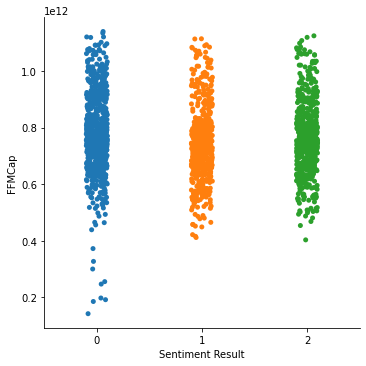

In [164]:
sns.catplot(x="Sentiment Result", y="FFMCap", data=newindexdf)

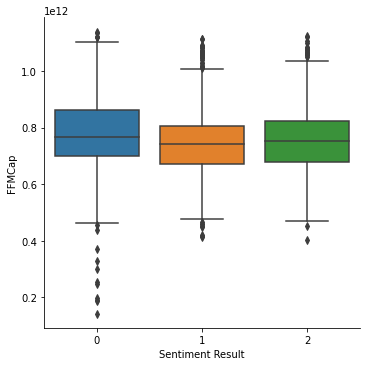

In [165]:
sns.catplot(x="Sentiment Result", y="FFMCap", kind="box", data=newindexdf)


(<Figure size 900x1101.6 with 10 Axes>,
 array([<AxesSubplot:ylabel='2012'>, <AxesSubplot:ylabel='2013'>,
        <AxesSubplot:ylabel='2014'>, <AxesSubplot:ylabel='2015'>,
        <AxesSubplot:ylabel='2016'>, <AxesSubplot:ylabel='2017'>,
        <AxesSubplot:ylabel='2018'>, <AxesSubplot:ylabel='2019'>,
        <AxesSubplot:ylabel='2020'>], dtype=object))

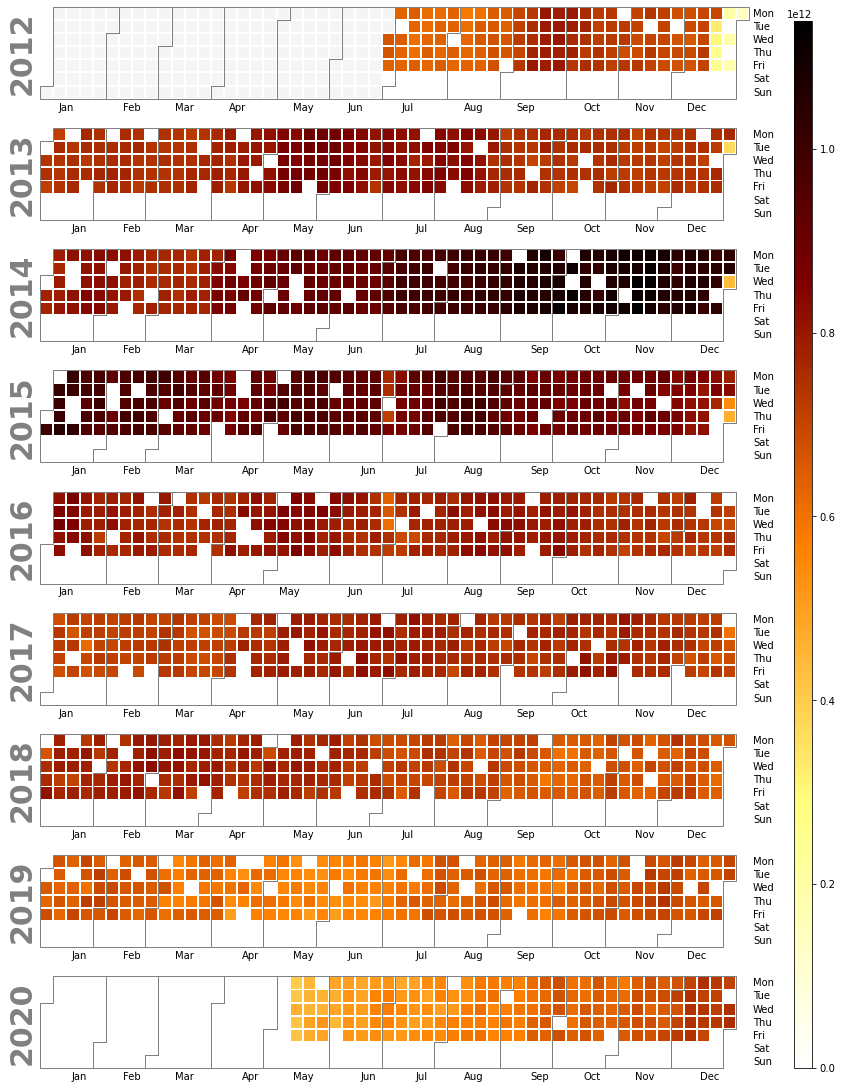

In [166]:
import calplot
aa=newindexdf
aa=aa.set_index("Trading Date")
calplot.calplot(aa['FFMCap'],cmap="afmhot_r")


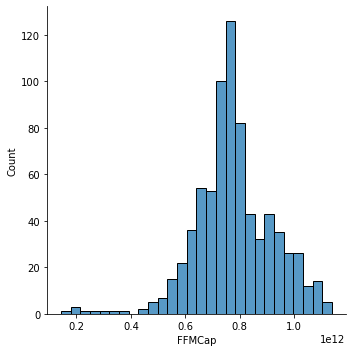

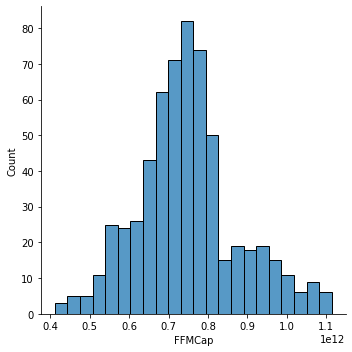

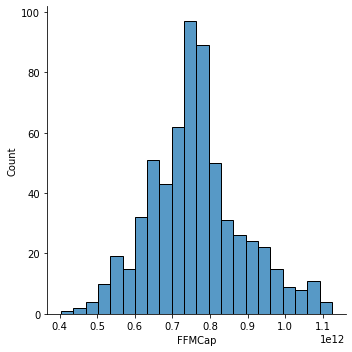

In [167]:
import matplotlib.pyplot as plt

sns.displot(newindexdf[newindexdf['Sentiment Result']==0], x="FFMCap")
sns.displot(newindexdf[newindexdf['Sentiment Result']==1], x="FFMCap")
sns.displot(newindexdf[newindexdf['Sentiment Result']==2], x="FFMCap")

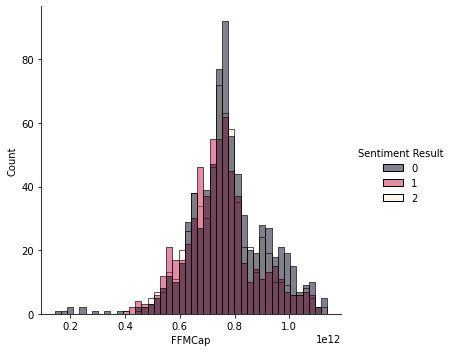

In [168]:
sns.displot(newindexdf, x="FFMCap",hue="Sentiment Result",palette="rocket")


# Calculate the difference between market cap in two consecutive days

In [169]:
newindexdf['DifferenceOfMcap']=0.0
for i in newindexdf.index+1:
    if i==1971:
        break;
    previousdaymcap=newindexdf['FFMCap'][i-1]
    todaymcap=newindexdf['FFMCap'][i]
    newindexdf['DifferenceOfMcap'][i]=todaymcap-previousdaymcap
newindexdf

<ipython-input-169-ac2efe1b3789>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Trading Date,FFMCap,ASPI,SL20,Divisor,Sentiment Result,DifferenceOfMcap
0,2012-06-27,665930217978.550537,4995.69,2845.23,1908749.946756,1,0.000000e+00
1,2012-06-28,664397156477.341064,4955.91,2811.52,1896562.582742,2,-1.533062e+09
2,2012-06-29,640146855834.757812,4965.77,2817.35,1831555.09448,1,-2.425030e+10
3,2012-07-02,632134232179.988647,4952.93,2810.37,1877145.030936,2,-8.012624e+09
4,2012-07-04,647740408581.631592,4946.58,2809.31,1947869.318061,2,1.560618e+10
...,...,...,...,...,...,...,...
1966,2020-12-23,719390317747.690063,6629.02,2574.73,1923935.262499,1,8.598747e+09
1967,2020-12-24,732570245717.971436,6685.64,2599.67,1935765.842705,1,1.317993e+10
1968,2020-12-28,710737024396.692627,6704.89,2614.84,1844284.00553,2,-2.183322e+10
1969,2020-12-30,750795698026.519531,6748.01,2631.53,2008079.817345,1,4.005867e+10


In [170]:
#get the minimum of the difference of Market cap
minMCap=abs(newindexdf['DifferenceOfMcap'].loc[1:]).min()
maxMCap=abs(newindexdf['DifferenceOfMcap'].loc[1:]).max()
print(minMCap)
print(maxMCap)

3983513.9140625
618279387853.0099


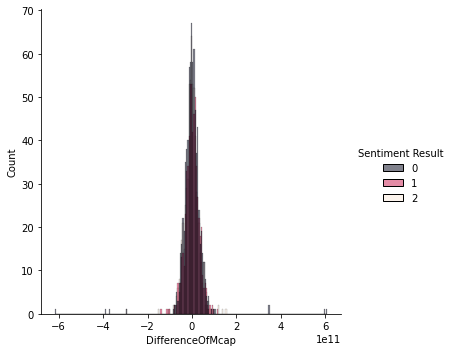

In [171]:
sns.displot(newindexdf, x="DifferenceOfMcap",hue="Sentiment Result",palette="rocket")

In [172]:
f=minMCap/maxMCap
f

6.442902662330938e-06

In [173]:
tempdf=newindexdf.copy()

newindexdf.to_csv("newindexdf.csv")

In [174]:
meannue=newindexdf[newindexdf['Sentiment Result']==0]['FFMCap'].mean()
meanpos=newindexdf[newindexdf['Sentiment Result']==1]['FFMCap'].mean()
meanneg=newindexdf[newindexdf['Sentiment Result']==2]['FFMCap'].mean()

In [175]:
print(meannue)
print(meanpos)
print(meanneg)

778384756084.8457
747925004015.958
762521238174.3962


# New index based on sentiment

In [176]:
newlabel={0:0,1:1,2:-1}
newindexdf['SentimentIndex']=0.0
newindexdf=newindexdf.replace({"Sentiment Result": newlabel})

newindexdf['Sentiment Result']=newindexdf['Sentiment Result'].astype(float)
newindexdf['FFMCap']=newindexdf['FFMCap'].astype(float)

for i in newindexdf.index:
    mcap=newindexdf['FFMCap'][i].item()
    sentres=(newindexdf['Sentiment Result'][i].item()) 
    meanMCap=0
    if sentres==0:
        meanMCap=meannue
    elif sentres==1:
        meanMCap=meanpos
    else :
        meanMCap=meanneg
    divisor=(newindexdf['Divisor'][i].item())
    indexVal=(mcap+f*sentres*(meanMCap))/(divisor*100)
    newindexdf['SentimentIndex'][i]=indexVal
newindexdf

<ipython-input-176-c61167c84f4a>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Trading Date,FFMCap,ASPI,SL20,Divisor,Sentiment Result,DifferenceOfMcap,SentimentIndex
0,2012-06-27,6.659302e+11,4995.69,2845.23,1908749.946756,1.0,0.000000e+00,3488.854252
1,2012-06-28,6.643972e+11,4955.91,2811.52,1896562.582742,-1.0,-1.533062e+09,3503.139046
2,2012-06-29,6.401469e+11,4965.77,2817.35,1831555.09448,1.0,-2.425030e+10,3495.126500
3,2012-07-02,6.321342e+11,4952.93,2810.37,1877145.030936,-1.0,-8.012624e+09,3367.503890
4,2012-07-04,6.477404e+11,4946.58,2809.31,1947869.318061,-1.0,1.560618e+10,3325.353964
...,...,...,...,...,...,...,...,...
1966,2020-12-23,7.193903e+11,6629.02,2574.73,1923935.262499,1.0,8.598747e+09,3739.185775
1967,2020-12-24,7.325702e+11,6685.64,2599.67,1935765.842705,1.0,1.317993e+10,3784.419832
1968,2020-12-28,7.107370e+11,6704.89,2614.84,1844284.00553,-1.0,-2.183322e+10,3853.702084
1969,2020-12-30,7.507957e+11,6748.01,2631.53,2008079.817345,1.0,4.005867e+10,3738.897779


In [177]:
import numpy
newindexdf['SentimentIndex']=newindexdf['SentimentIndex'].astype(numpy.float64)
newindexdf['ASPI']=newindexdf['ASPI'].astype(numpy.float64)
newindexdf['SL20']=newindexdf['SL20'].astype(numpy.float64)

In [178]:
#remove the garbage data
index_list= newindexdf['Trading Date'][((newindexdf['Trading Date']>='2012-12-18') & (newindexdf['Trading Date'] <= '2013-01-03'))].index.tolist()
index_list.append(367)
index_list.append(608)
index_list.append(845)
index_list.append(846)
index_list.append(1689)

newindexdf.drop(newindexdf.index[index_list] , inplace = True)

In [180]:
import plotly.express as px


fig = px.line(newindexdf, x='Trading Date', y=['ASPI','SentimentIndex','SL20'],title="New Index, ASPI and SL20")
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [181]:
newindexdf.to_csv("finalindex.csv")

In [244]:
newindexdf

,Trading Date,FFMCap,ASPI,SL20,Divisor,Sentiment Result,DifferenceOfMcap,SentimentIndex,Daily Return,Daily ReturnASPI
0,2012-06-27,6.659302e+11,4995.69,2845.23,1908749.946756,1.0,0.000000e+00,3488.854252,0.000000,0.000000
1,2012-06-28,6.643972e+11,4955.91,2811.52,1896562.582742,-1.0,-1.533062e+09,3503.139046,0.409441,0.796286
2,2012-06-29,6.401469e+11,4965.77,2817.35,1831555.09448,1.0,-2.425030e+10,3495.126500,0.228725,0.198954
3,2012-07-02,6.321342e+11,4952.93,2810.37,1877145.030936,-1.0,-8.012624e+09,3367.503890,3.651445,0.258570
4,2012-07-04,6.477404e+11,4946.58,2809.31,1947869.318061,-1.0,1.560618e+10,3325.353964,1.251667,0.128207
...,...,...,...,...,...,...,...,...,...,...
1951,2020-12-23,7.193903e+11,6629.02,2574.73,1923935.262499,1.0,8.598747e+09,3739.185775,2.183005,0.088923
1952,2020-12-24,7.325702e+11,6685.64,2599.67,1935765.842705,1.0,1.317993e+10,3784.419832,1.209730,0.854123
1953,2020-12-28,7.107370e+11,6704.89,2614.84,1844284.00553,-1.0,-2.183322e+10,3853.702084,1.830723,0.287931
1954,2020-12-30,7.507957e+11,6748.01,2631.53,2008079.817345,1.0,4.005867e+10,3738.897779,2.979065,0.643113


In [243]:
#calculate the daily returns
newindexdf['Daily Return']=0.0
newindexdf['Daily ReturnASPI']=0.0

newindexdf.reset_index(drop=True,inplace=True)
for i in newindexdf.index+1:
    if i>1955:
        break;
    today=(newindexdf['SentimentIndex'][i].item())
    prvs=(newindexdf['SentimentIndex'][i-1].item())
    dreturn=(abs(today-prvs)/prvs*100)
    newindexdf['Daily Return'][i]=dreturn.real
    
    today=(newindexdf['ASPI'][i].item())
    prvs=(newindexdf['ASPI'][i-1].item())
    dreturn=(abs(today-prvs)/prvs*100)
    newindexdf['Daily ReturnASPI'][i]=dreturn.real
 
    





<ipython-input-243-0ddfd9e1edb2>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-243-0ddfd9e1edb2>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [245]:

fig = px.line(newindexdf, x='Trading Date', y=['Daily Return','Daily ReturnASPI'])
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

# Price Return on Index Calculation for year 2019

In [77]:
returndf=newindexdf[newindexdf['Trading Date']>'2018-12-31']
returndf=returndf[returndf['Trading Date']<'2020-01-01']
returndf=returndf.reset_index(drop=True)
returndf=returndf.iloc[:-2 , :]
returndf

,Trading Date,FFMCap,ASPI,SL20,Divisor,Sentiment Result,DifferenceOfMcap,SentimentIndex
0,2019-01-02,6.542316e+11,6062.20,3111.07,1857058.975502,0.0,-1.545862e+10,3522.944849
1,2019-01-03,6.267668e+11,6058.48,3091.52,1821136.859681,-1.0,-2.746483e+10,3441.596893
2,2019-01-04,6.847930e+11,6067.66,3105.75,2076928.17974,-1.0,5.802622e+10,3297.119885
3,2019-01-07,6.708994e+11,6022.99,3070.20,1862370.986952,0.0,-1.389365e+10,3602.393893
4,2019-01-08,6.537817e+11,5992.36,3049.95,1852437.191299,0.0,-1.711770e+10,3529.305555
...,...,...,...,...,...,...,...,...
233,2019-12-23,6.546786e+11,6031.81,2927.69,1788177.286034,-1.0,-4.128368e+10,3661.122728
234,2019-12-24,6.619171e+11,6053.12,2948.45,1921956.724841,1.0,7.238520e+09,3444.000033
235,2019-12-26,6.593403e+11,6086.69,2965.34,1893538.696728,-1.0,-2.576756e+09,3482.027675
236,2019-12-27,7.119358e+11,6122.64,2972.09,2052576.296407,-1.0,5.259544e+10,3468.474509


In [78]:
fdayASPI=returndf['ASPI'][0]
fdaySL20=returndf['SL20'][0]
fdaySentimentIndex=returndf['SentimentIndex'][0]

edayASPI=returndf['ASPI'].iloc[-1:]
edaySL20=returndf['SL20'].iloc[-1:]
edaySentimentIndex=returndf['SentimentIndex'].iloc[-1:]

In [79]:
#Return on New Index
ROInew=float((abs(edaySentimentIndex-fdaySentimentIndex))/fdaySentimentIndex)*100
ROIaspi=float((abs(edayASPI-fdayASPI))/fdayASPI)*100
ROIsl20=float((abs(edaySL20-fdaySL20))/fdaySL20)*100

print('Return on ASPI for 2019 ',round(ROIaspi, 3),'%')
print('Return on SL20 for 2019 ',round(ROIsl20, 3),'%')
print('Return on New Index for 2019 ',round(ROInew, 3),'%')


Return on ASPI for 2019  1.105 %
Return on SL20 for 2019  5.596 %
Return on New Index for 2019  6.309 %


In [80]:
#price return for whole period
fdayASPI=newindexdf['ASPI'][0]
fdaySL20=newindexdf['SL20'][0]
fdaySentimentIndex=newindexdf['SentimentIndex'][0]

edayASPI=newindexdf['ASPI'].iloc[-1:]
edaySL20=newindexdf['SL20'].iloc[-1:]
edaySentimentIndex=newindexdf['SentimentIndex'].iloc[-1:]

#Return on New Index
ROInew=float((abs(edaySentimentIndex-fdaySentimentIndex))/fdaySentimentIndex)*100
ROIaspi=float((abs(edayASPI-fdayASPI))/fdayASPI)*100
ROIsl20=float((abs(edaySL20-fdaySL20))/fdaySL20)*100

print('Return on ASPI for whole period ',round(ROIaspi, 3),'%')
print('Return on SL20 for  whole period  ',round(ROIsl20, 3),'%')
print('Return on New Index for  whole period  ',round(ROInew, 3),'%')




Return on ASPI for whole period  35.601 %
Return on SL20 for  whole period   7.28 %
Return on New Index for  whole period   13.207 %


# Yearly Return

In [81]:
newindexdf['Trading Date'] = pd.to_datetime(newindexdf['Trading Date'],format='%Y%m%d')
newindexdf['year'] = pd.DatetimeIndex(newindexdf['Trading Date']).year

for i in range(2012,2021):
    temp=newindexdf[newindexdf['year']==i]
    temp=temp.dropna(axis=0)
    temp=temp.reset_index(drop=True)
    fdayASPI=temp['ASPI'][0]
    fdaySL20=temp['SL20'][0]
    fdaySentimentIndex=temp['SentimentIndex'][0]

    edayASPI=temp['ASPI'].iloc[-1:]
    edaySL20=temp['SL20'].iloc[-1:]
    edaySentimentIndex=temp['SentimentIndex'].iloc[-1:]

    #Return on New Index
    ROInew=float((abs(edaySentimentIndex-fdaySentimentIndex))/fdaySentimentIndex)*100
    ROIaspi=float((abs(edayASPI-fdayASPI))/fdayASPI)*100
    ROIsl20=float((abs(edaySL20-fdaySL20))/fdaySL20)*100
    print()
    print('Return on ASPI for year  ',i,round(ROIaspi, 3),'%')
    print('Return on SL20 for year  ',i,round(ROIsl20, 3),'%')
    print('Return on New Index for year  ',i,round(ROInew, 3),'%')


Return on ASPI for year   2012 10.165 %
Return on SL20 for year   2012 5.771 %
Return on New Index for year   2012 6.515 %

Return on ASPI for year   2013 2.872 %
Return on SL20 for year   2013 4.554 %
Return on New Index for year   2013 2.37 %

Return on ASPI for year   2014 22.301 %
Return on SL20 for year   2014 24.464 %
Return on New Index for year   2014 46.546 %

Return on ASPI for year   2015 6.665 %
Return on SL20 for year   2015 12.32 %
Return on New Index for year   2015 22.654 %

Return on ASPI for year   2016 9.48 %
Return on SL20 for year   2016 3.242 %
Return on New Index for year   2016 1.549 %

Return on ASPI for year   2017 2.684 %
Return on SL20 for year   2017 5.65 %
Return on New Index for year   2017 4.638 %

Return on ASPI for year   2018 5.598 %
Return on SL20 for year   2018 15.326 %
Return on New Index for year   2018 3.815 %

Return on ASPI for year   2019 0.453 %
Return on SL20 for year   2019 4.897 %
Return on New Index for year   2019 5.524 %

Return on AS

# Cumulative Return Calculation

In [82]:

daily_returns = newindexdf[['ASPI','SentimentIndex','SL20']].pct_change()
cum_returns = (daily_returns + 1).cumprod()
cum_returns['Trading Date']=newindexdf['Trading Date']
cum_returns.index=cum_returns['Trading Date']



In [83]:
# Calculate the cumulative daily returns
df_cum_daily_returns = (1 + daily_returns).cumprod() - 1
df_cum_daily_returns = df_cum_daily_returns.reset_index()
df_cum_daily_returns['Trading Date']=newindexdf['Trading Date']

df_cum_daily_returns=df_cum_daily_returns.drop(axis=1,columns='index')
df_cum_daily_returns

,ASPI,SentimentIndex,SL20,Trading Date
0,NaN,NaN,NaN,2012-06-27
1,-0.007963,0.004094,-0.011848,2012-06-28
2,-0.005989,0.001798,-0.009799,2012-06-29
3,-0.008559,-0.034782,-0.012252,2012-07-02
4,-0.009830,-0.046864,-0.012625,2012-07-04
...,...,...,...,...
1951,0.326948,0.071752,-0.095071,2020-12-02
1952,0.338282,0.084717,-0.086306,2020-12-03
1953,0.342135,0.104575,-0.080974,2020-12-04
1954,0.350766,0.071669,-0.075108,2020-12-07


In [84]:
df2 = df_cum_daily_returns.melt(id_vars=['Trading Date'], var_name='ticker', value_name='cum_return')
df2['cum_return_pct'] = df2['cum_return'] * 100
df2

,Trading Date,ticker,cum_return,cum_return_pct
0,2012-06-27,ASPI,NaN,NaN
1,2012-06-28,ASPI,-0.007963,-0.796286
2,2012-06-29,ASPI,-0.005989,-0.598916
3,2012-07-02,ASPI,-0.008559,-0.855938
4,2012-07-04,ASPI,-0.009830,-0.983047
...,...,...,...,...
5863,2020-12-02,SL20,-0.095071,-9.507140
5864,2020-12-03,SL20,-0.086306,-8.630585
5865,2020-12-04,SL20,-0.080974,-8.097412
5866,2020-12-07,SL20,-0.075108,-7.510816


In [85]:
fig = px.line(df2, x='Trading Date',
              y='cum_return_pct', color='ticker',
              title='Performance - Daily Cumulative Returns',
              labels={'cum_return_pct':'daily cumulative returns (%)', })
fig.show()

# Prediction

In [86]:
#reomve the data of 2020 quarter 1, CSE was closed on these days due to covid. Therefore, ASPI index value is unavilable for these days
newindexdf.dropna(subset = ["ASPI"],inplace=True)
newindexdf=newindexdf.reset_index(drop=True,inplace=False)
newindexdf

,Trading Date,FFMCap,ASPI,SL20,Divisor,Sentiment Result,DifferenceOfMcap,SentimentIndex,year
0,2012-06-27,6.659302e+11,4995.69,2845.23,1908749.946756,1.0,0.000000e+00,3488.854252,2012
1,2012-06-28,6.643972e+11,4955.91,2811.52,1896562.582742,-1.0,-1.533062e+09,3503.139046,2012
2,2012-06-29,6.401469e+11,4965.77,2817.35,1831555.09448,1.0,-2.425030e+10,3495.126500,2012
3,2012-07-02,6.321342e+11,4952.93,2810.37,1877145.030936,-1.0,-8.012624e+09,3367.503890,2012
4,2012-07-04,6.477404e+11,4946.58,2809.31,1947869.318061,-1.0,1.560618e+10,3325.353964,2012
...,...,...,...,...,...,...,...,...,...
1950,2020-12-23,7.193903e+11,6629.02,2574.73,1923935.262499,1.0,8.598747e+09,3739.185775,2020
1951,2020-12-24,7.325702e+11,6685.64,2599.67,1935765.842705,1.0,1.317993e+10,3784.419832,2020
1952,2020-12-28,7.107370e+11,6704.89,2614.84,1844284.00553,-1.0,-2.183322e+10,3853.702084,2020
1953,2020-12-30,7.507957e+11,6748.01,2631.53,2008079.817345,1.0,4.005867e+10,3738.897779,2020


In [87]:
#Import the required Libraries
import pandas as PD
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import adam_v2
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

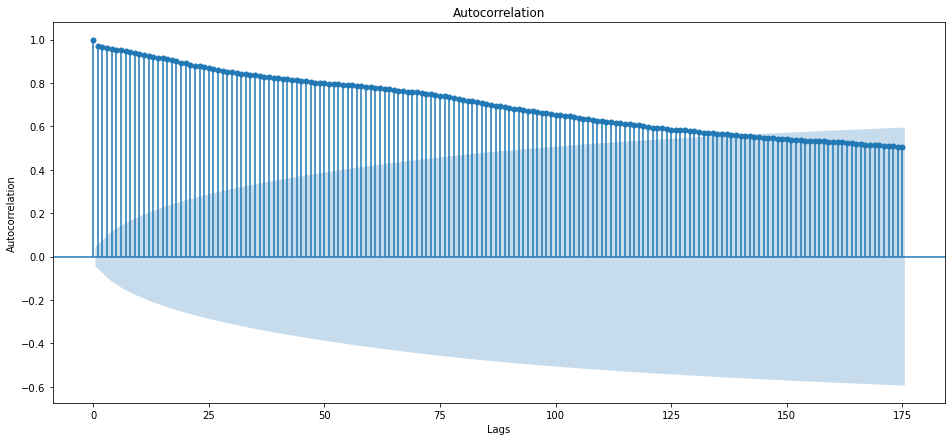

In [88]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot

fig, ax = plt.subplots(figsize=(16, 7))
plot_acf(newindexdf['SentimentIndex'],lags=175,ax=ax)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

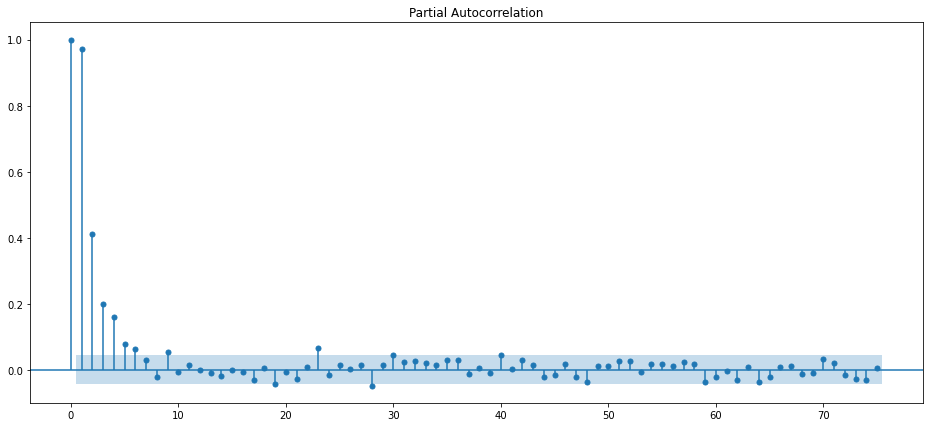

In [89]:
fig, ax = plt.subplots(figsize=(16, 7))
plot_pacf(newindexdf['SentimentIndex'], lags=75,ax=ax)
plt.show()

test for the stationarity or time dependency

H0:The time series is non-stationary.(it has some time-dependent structure and does not have constant variance over time)

H1: The time series is stationary (it doesn't has a time dependent structure)

In [90]:
#Augmented dickeyfuller test 
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(newindexdf['SentimentIndex'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                   -2.066327
p-value                           0.258268
#Lags Used                        8.000000
Number of Observations Used    1946.000000
Critical Value (1%)              -3.433715
Critical Value (5%)              -2.863026
Critical Value (10%)             -2.567561
dtype: float64


There is no enough evidence to reject the null hypotheis at 5% level of significance. 

In [91]:
#Set Target Variable
newindexdf.set_index(['Trading Date'],drop=True,inplace=True)
output_var = pd.DataFrame(newindexdf['SentimentIndex'])

#add lagged values
newindexdf['Lag1']=newindexdf['SentimentIndex'].shift(-1)
newindexdf['Lag2']=newindexdf['SentimentIndex'].shift(-2)
newindexdf['Lag3']=newindexdf['SentimentIndex'].shift(-3)
newindexdf['Lag4']=newindexdf['SentimentIndex'].shift(-4)
newindexdf['Lag5']=newindexdf['SentimentIndex'].shift(-5)

#replace the missing values with zero
newindexdf = newindexdf.fillna(0)


#Selecting the Features
features = ['SentimentIndex','Lag1','Lag2','Lag3','Lag4','Lag5']

In [92]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(newindexdf[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=newindexdf.index)
feature_transform.head()

,SentimentIndex,Lag1,Lag2,Lag3,Lag4,Lag5
Trading Date,,,,,,
2012-06-27,0.353026,0.584496,0.583159,0.561865,0.554832,0.568535
2012-06-28,0.356716,0.583159,0.561865,0.554832,0.568535,0.553745
2012-06-29,0.354647,0.561865,0.554832,0.568535,0.553745,0.552295
2012-07-02,0.321680,0.554832,0.568535,0.553745,0.552295,0.566713
2012-07-04,0.310792,0.568535,0.553745,0.552295,0.566713,0.553427


In [93]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=2)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [94]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

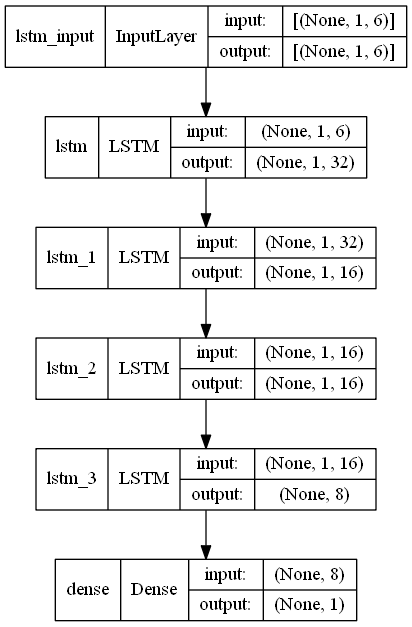

In [95]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=True))
lstm.add(LSTM(16,  activation='relu', return_sequences=True))
lstm.add(LSTM(16,  activation='relu', return_sequences=True))
lstm.add(LSTM(8,  activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [96]:
history=lstm.fit(X_train, y_train, epochs=150, batch_size=8, verbose=1, shuffle=False)
y_pred= lstm.predict(X_test)


Epoch 1/150
163/163 [==============================] - 9s 4ms/step - loss: 19007470.0000
Epoch 2/150
163/163 [==============================] - 1s 3ms/step - loss: 12743660.0000
Epoch 3/150
163/163 [==============================] - 1s 3ms/step - loss: 422777.3750
Epoch 4/150
163/163 [==============================] - 1s 3ms/step - loss: 11236.5791
Epoch 5/150
163/163 [==============================] - 1s 3ms/step - loss: 11100.4414
Epoch 6/150
163/163 [==============================] - 1s 3ms/step - loss: 10993.8711
Epoch 7/150
163/163 [==============================] - 1s 3ms/step - loss: 10915.0410
Epoch 8/150
163/163 [==============================] - 1s 3ms/step - loss: 10857.4541
Epoch 9/150
163/163 [==============================] - 1s 3ms/step - loss: 10816.1357
Epoch 10/150
163/163 [==============================] - 1s 3ms/step - loss: 10787.5420
Epoch 11/150
163/163 [==============================] - 1s 3ms/step - loss: 10769.1211
Epoch 12/150
163/163 [=======================

163/163 [==============================] - 1s 3ms/step - loss: 7921.9399
Epoch 96/150
163/163 [==============================] - 1s 3ms/step - loss: 7879.2866
Epoch 97/150
163/163 [==============================] - 1s 3ms/step - loss: 7836.6011
Epoch 98/150
163/163 [==============================] - 1s 3ms/step - loss: 7793.8965
Epoch 99/150
163/163 [==============================] - 1s 3ms/step - loss: 7751.1489
Epoch 100/150
163/163 [==============================] - 1s 3ms/step - loss: 7708.3882
Epoch 101/150
163/163 [==============================] - 1s 3ms/step - loss: 7665.6348
Epoch 102/150
163/163 [==============================] - 1s 3ms/step - loss: 7622.9102
Epoch 103/150
163/163 [==============================] - 1s 3ms/step - loss: 7580.1748
Epoch 104/150
163/163 [==============================] - 1s 3ms/step - loss: 7537.4761
Epoch 105/150
163/163 [==============================] - 1s 3ms/step - loss: 7494.7983
Epoch 106/150
163/163 [==============================] - 1s 3

In [97]:
#RMSE
y_pred2=numpy.concatenate( y_pred, axis=0 )
np.sqrt(np.mean(np.power((y_pred2-y_test),2)))

189.19998825520278

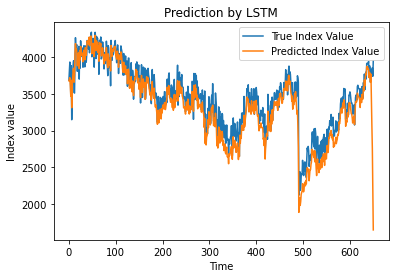

In [98]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Index Value')
plt.plot(y_pred, label='Predicted Index Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time')
plt.ylabel('Index value')
plt.legend()
plt.show()


# Analysis based in Sentiment Analysis

<AxesSubplot:xlabel='Sentiment Result', ylabel='SentimentIndex'>

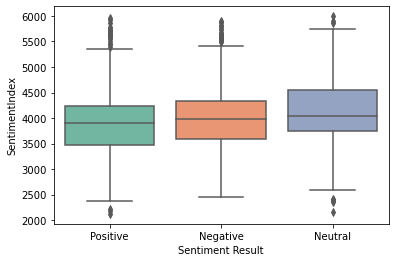

In [99]:
label={0.0:'Neutral',1.0:'Positive',-1.0:'Negative'}
newindexdft=newindexdf.replace({"Sentiment Result": label})

sns.boxplot(y = newindexdft['SentimentIndex'],x = newindexdft['Sentiment Result'],palette = 'Set2')

<AxesSubplot:xlabel='Sentiment Result', ylabel='ASPI'>

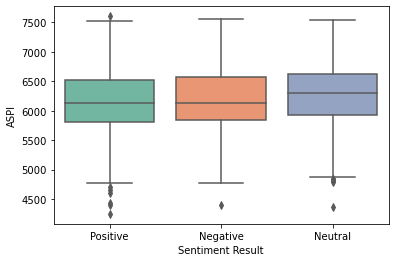

In [100]:
label={0.0:'Neutral',1.0:'Positive',-1.0:'Negative'}
newindexdft=newindexdf.replace({"Sentiment Result": label})
sns.boxplot(y = newindexdft['ASPI'],x = newindexdft['Sentiment Result'],palette = 'Set2')

In [101]:
newindexdft=newindexdft.reset_index(drop=False)

fig = px.line(newindexdft, x="Trading Date", y="SentimentIndex", color='Sentiment Result')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.update_layout(autotypenumbers='convert types')

fig.show()

In [102]:
aa=newindexdf

In [103]:
from statsmodels.formula.api import ols
newindexdft=newindexdft.rename({'Sentiment Result':'SentimentResult'},axis=1)
newindexdft['SentimentIndex']=pd.to_numeric(newindexdft['SentimentIndex'])
model = ols('SentimentIndex ~  C(SentimentResult)', data=newindexdft)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         SentimentIndex   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     16.37
Date:                Wed, 04 May 2022   Prob (F-statistic):           8.92e-08
Time:                        05:42:23   Log-Likelihood:                -15487.
No. Observations:                1955   AIC:                         3.098e+04
Df Residuals:                    1952   BIC:                         3.100e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       4019.7235     26.700    150.552      0.000    3967.360    4072.087
C(SentimentResult)[T.Neutral]    116.6039     36.365      3.207      0.001      45.286     187.922
C(SentimentResult)[T.Positive]   -92.3167     38.167     -2.419      0.016    -167.169     -17.464
==============================================================================
Omnibus:                       46.657   Durbin-Watson:                   0.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.458
Skew:                           0.378   Prob(JB):                     1.82e-11
Kurtosis:                       3.187   Cond. No.                         3.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""